In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import lazypredict
import matplotlib.pyplot as plt
import numpy as np

train_df=pd.read_csv("C:/Users/pfali/Downloads/playground-series-s3e18/train.csv")
test_df=pd.read_csv("C:/Users/pfali/Downloads/playground-series-s3e18/enzymes_test.csv")

In [2]:
pd.set_option('display.max_rows',None)
train_df.isnull().sum()

id                   0
BertzCT              0
Chi1                 0
Chi1n                0
Chi1v                0
Chi2n                0
Chi2v                0
Chi3v                0
Chi4n                0
EState_VSA1          0
EState_VSA2          0
ExactMolWt           0
FpDensityMorgan1     0
FpDensityMorgan2     0
FpDensityMorgan3     0
HallKierAlpha        0
HeavyAtomMolWt       0
Kappa3               0
MaxAbsEStateIndex    0
MinEStateIndex       0
NumHeteroatoms       0
PEOE_VSA10           0
PEOE_VSA14           0
PEOE_VSA6            0
PEOE_VSA7            0
PEOE_VSA8            0
SMR_VSA10            0
SMR_VSA5             0
SlogP_VSA3           0
VSA_EState9          0
fr_COO               0
fr_COO2              0
EC1                  0
EC2                  0
EC3                  0
EC4                  0
EC5                  0
EC6                  0
dtype: int64

In [3]:
pd.set_option('display.max_rows',None)
test_df.isnull().sum()

id                   0
BertzCT              0
Chi1                 0
Chi1n                0
Chi1v                0
Chi2n                0
Chi2v                0
Chi3v                0
Chi4n                0
EState_VSA1          0
EState_VSA2          0
ExactMolWt           0
FpDensityMorgan1     0
FpDensityMorgan2     0
FpDensityMorgan3     0
HallKierAlpha        0
HeavyAtomMolWt       0
Kappa3               0
MaxAbsEStateIndex    0
MinEStateIndex       0
NumHeteroatoms       0
PEOE_VSA10           0
PEOE_VSA14           0
PEOE_VSA6            0
PEOE_VSA7            0
PEOE_VSA8            0
SMR_VSA10            0
SMR_VSA5             0
SlogP_VSA3           0
VSA_EState9          0
fr_COO               0
fr_COO2              0
dtype: int64

In [4]:
train_df.dtypes

id                     int64
BertzCT              float64
Chi1                 float64
Chi1n                float64
Chi1v                float64
Chi2n                float64
Chi2v                float64
Chi3v                float64
Chi4n                float64
EState_VSA1          float64
EState_VSA2          float64
ExactMolWt           float64
FpDensityMorgan1     float64
FpDensityMorgan2     float64
FpDensityMorgan3     float64
HallKierAlpha        float64
HeavyAtomMolWt       float64
Kappa3               float64
MaxAbsEStateIndex    float64
MinEStateIndex       float64
NumHeteroatoms         int64
PEOE_VSA10           float64
PEOE_VSA14           float64
PEOE_VSA6            float64
PEOE_VSA7            float64
PEOE_VSA8            float64
SMR_VSA10            float64
SMR_VSA5             float64
SlogP_VSA3           float64
VSA_EState9          float64
fr_COO                 int64
fr_COO2                int64
EC1                    int64
EC2                    int64
EC3           

In [5]:
pd.set_option('display.max_columns',None)
train_df.describe(include='all')

id       BertzCT          Chi1         Chi1n         Chi1v  \
count  14838.000000  14838.000000  14838.000000  14838.000000  14838.000000   
mean    7418.500000    515.153604      9.135189      5.854307      6.738497   
std     4283.505982    542.456370      6.819989      4.647064      5.866444   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%     3709.250000    149.103601      4.680739      2.844556      2.932842   
50%     7418.500000    290.987941      6.485270      4.052701      4.392859   
75%    11127.750000    652.652585     11.170477      7.486791      8.527859   
max    14837.000000   4069.959780     69.551167     50.174588     53.431954   

              Chi2n         Chi2v         Chi3v         Chi4n   EState_VSA1  \
count  14838.000000  14838.000000  14838.000000  14838.000000  14838.000000   
mean       4.432570      5.253221      3.418749      1.773472     29.202823   
std        3.760516      4.925065      3.436208      1.865898     31.728679   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.949719      2.034468      1.160763      0.503897      5.969305   
50%        2.970427      3.242775      1.948613      1.073261     17.353601   
75%        5.788793      6.609350      4.502070      2.534281     44.876559   
max       32.195368     34.579313     22.880836     16.072810    363.705954   

        EState_VSA2    ExactMolWt  FpDensityMorgan1  FpDensityMorgan2  \
count  14838.000000  14838.000000      14838.000000      14838.000000   
mean      10.435316    292.623087          1.236774          1.812070   
std       13.651843    225.384140          5.491284          5.495565   
min        0.000000      1.007276       -666.000000       -666.000000   
25%        0.000000    148.037173          1.045455          1.690909   
50%        6.420822    206.042653          1.250000          1.865152   
75%       12.841643    343.090331          1.500000          2.062153   
max       99.936429   2237.318490          3.000000          3.200000   

       FpDensityMorgan3  HallKierAlpha  HeavyAtomMolWt        Kappa3  \
count      14838.000000   14838.000000    14838.000000  14838.000000   
mean           2.255470      -1.207776      274.950211      5.874372   
std            5.501200       0.935314      212.678755     45.730226   
min         -666.000000      -7.730000        0.000000   -104.040000   
25%            2.100000      -1.660000      136.109000      1.784008   
50%            2.358491      -1.100000      194.276500      3.261011   
75%            2.500000      -0.570000      326.002000      5.848400   
max            3.400000       0.820000     2035.133000   1512.242231   

       MaxAbsEStateIndex  MinEStateIndex  NumHeteroatoms    PEOE_VSA10  \
count       14838.000000    14838.000000    14838.000000  14838.000000   
mean           10.556443       -2.119772        8.584108     11.021644   
std             1.559331        2.066415        7.643769     13.958962   
min             0.000000       -6.327514        0.000000      0.000000   
25%             9.926190       -4.659604        4.000000      0.000000   
50%            10.421334       -1.265370        6.000000      6.041841   
75%            11.539743       -0.787037       10.000000     18.311899   
max            15.630251        6.000000       42.000000     97.663462   

         PEOE_VSA14     PEOE_VSA6     PEOE_VSA7     PEOE_VSA8     SMR_VSA10  \
count  14838.000000  14838.000000  14838.000000  14838.000000  14838.000000   
mean      17.790011      8.962440     11.318811      6.704487     15.666766   
std       34.561655     19.756727     20.169745     10.865415     18.080208   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      5.969305   
50%        5.969305      0.000000      0.000000      0.000000     11.752550   
75%       15.645394     12.132734     13.847474      6.923737     

Our task is to predict either class EC1 or EC2, so we can delete EC3, EC4, EC5, EC6 and all instances that were classified as one of those enzymes.

In [6]:
train_df.drop(columns=['EC3','EC4','EC5','EC6'],inplace=True)
other_enzymes=train_df[(train_df['EC1']==0)&(train_df['EC2']==0)].index
train_df.drop(other_enzymes, inplace=True)

In [7]:
features=train_df.columns.tolist()
features.remove('EC1')
features.remove('EC2')
features.remove('id')

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

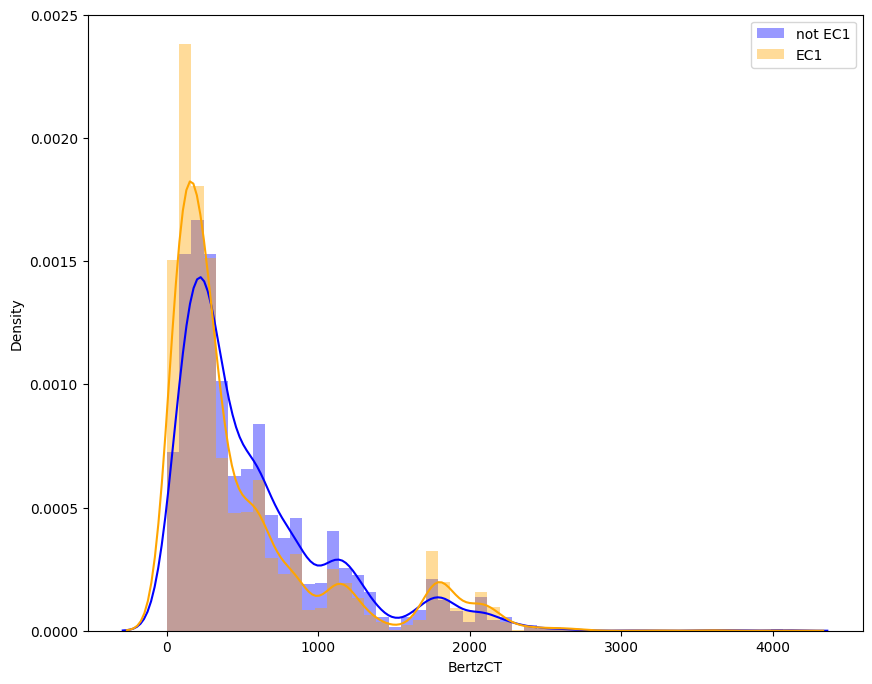

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

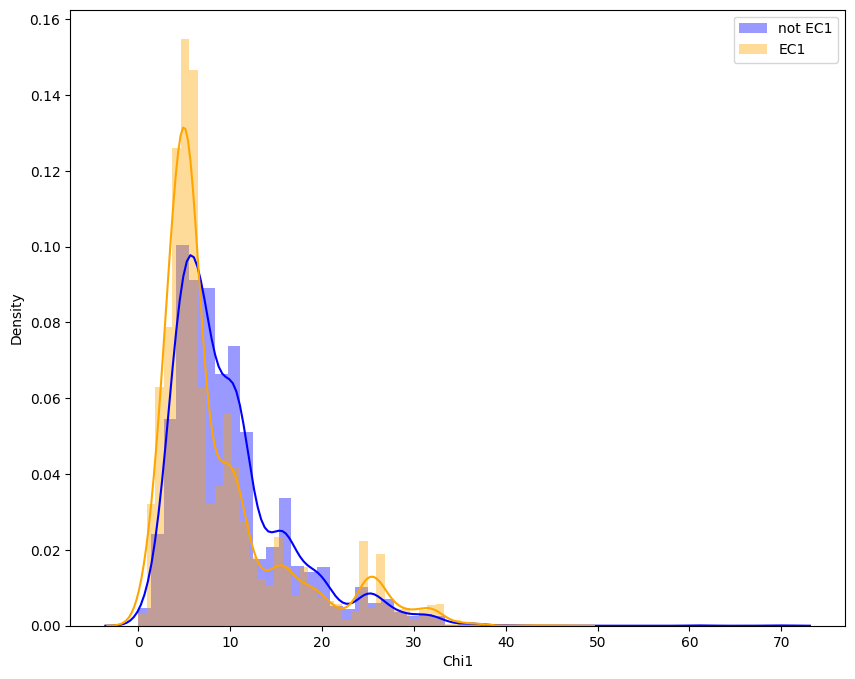

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

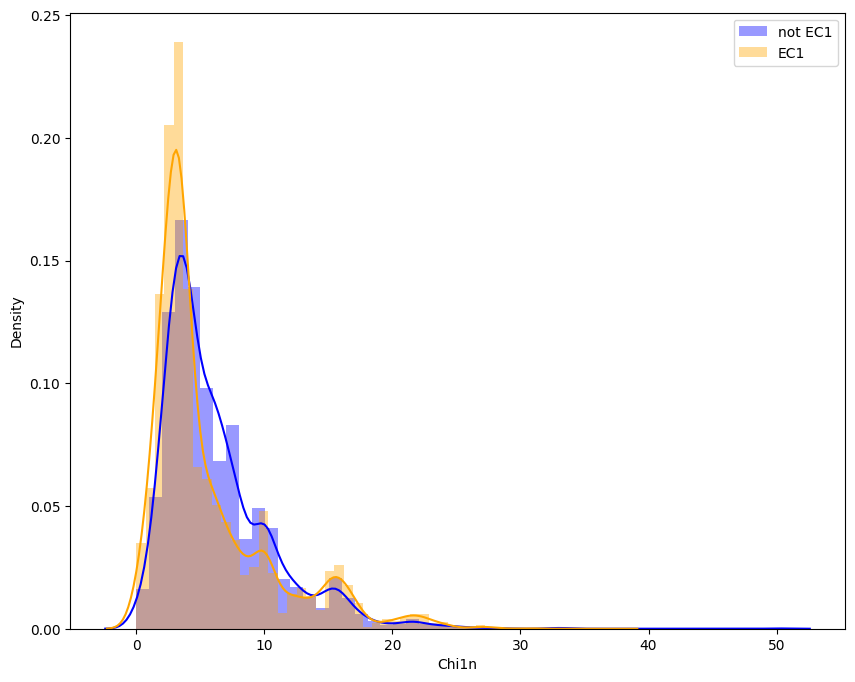

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

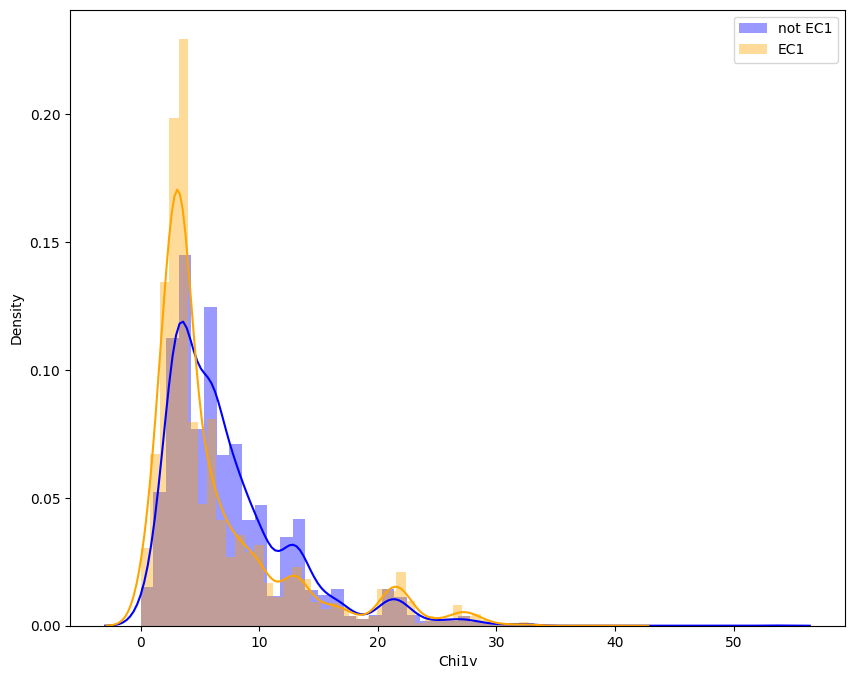

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

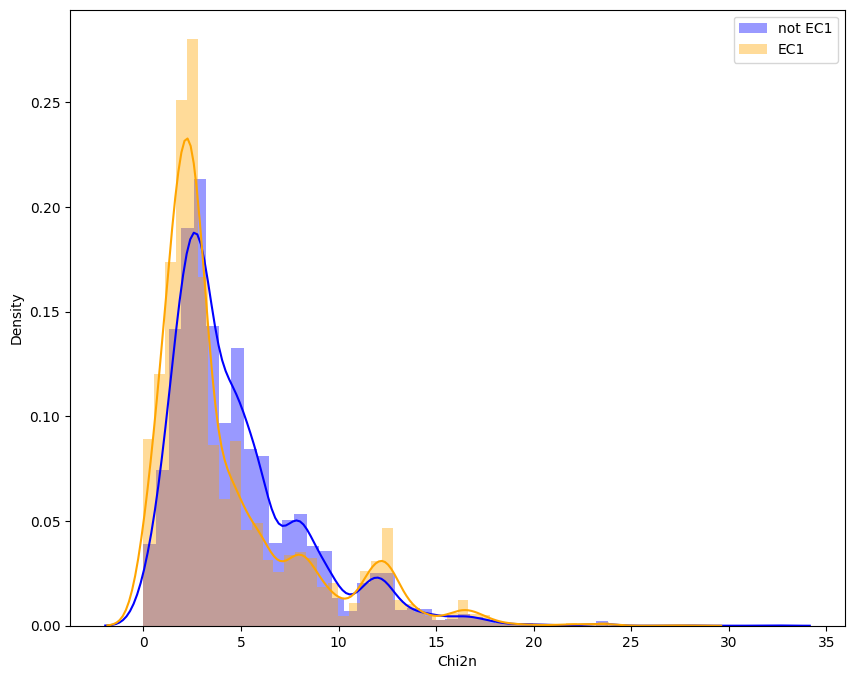

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

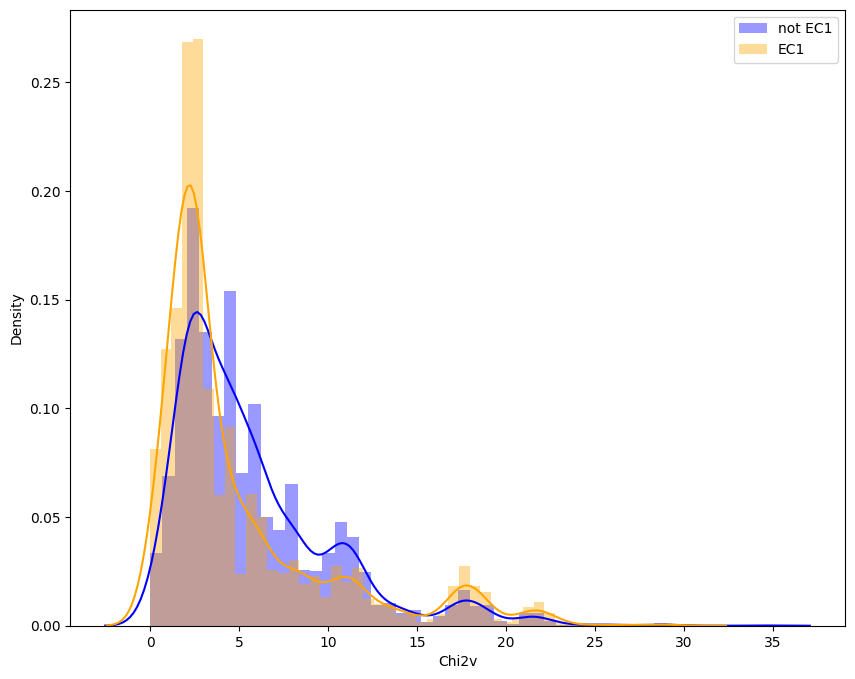

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

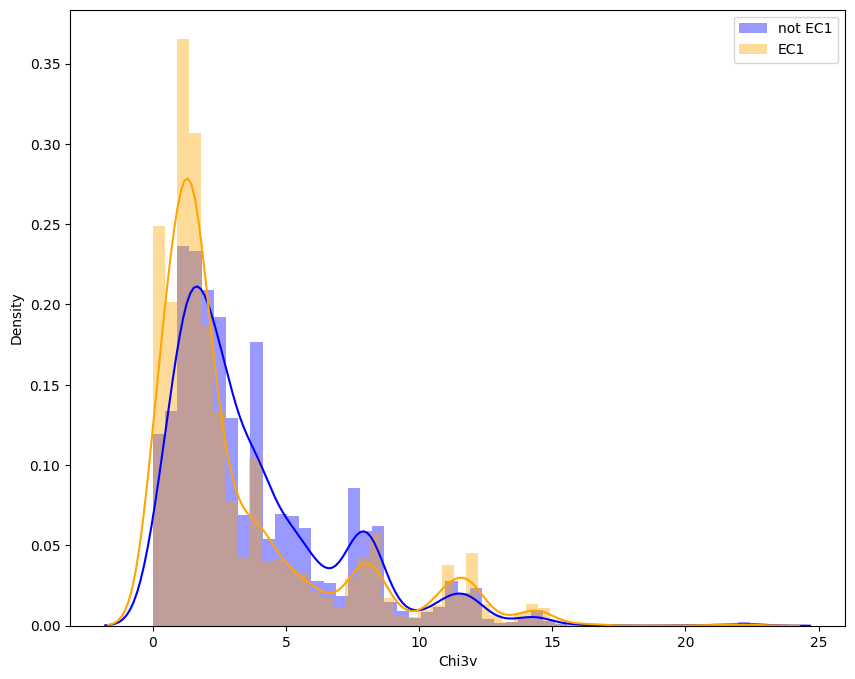

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

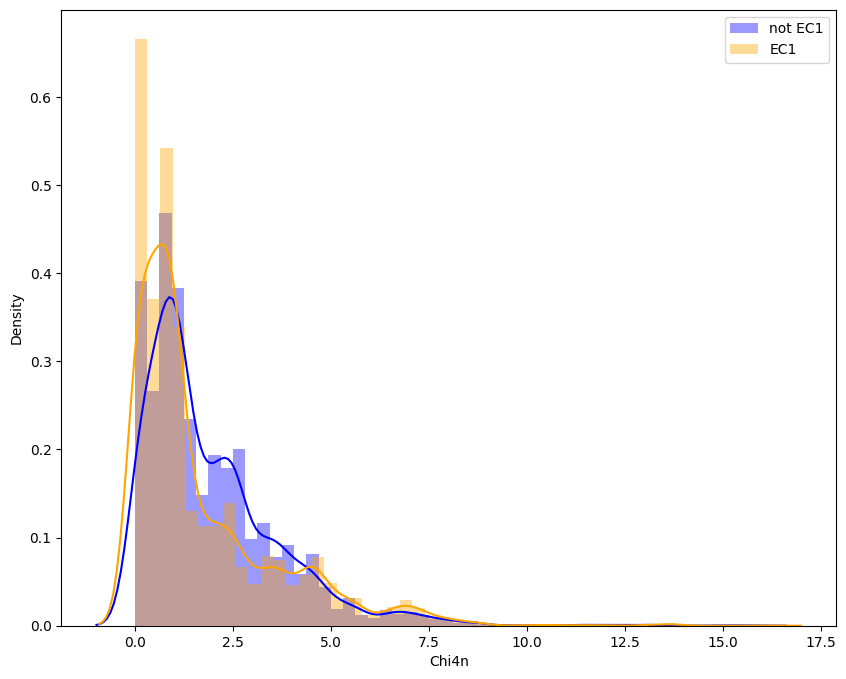

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

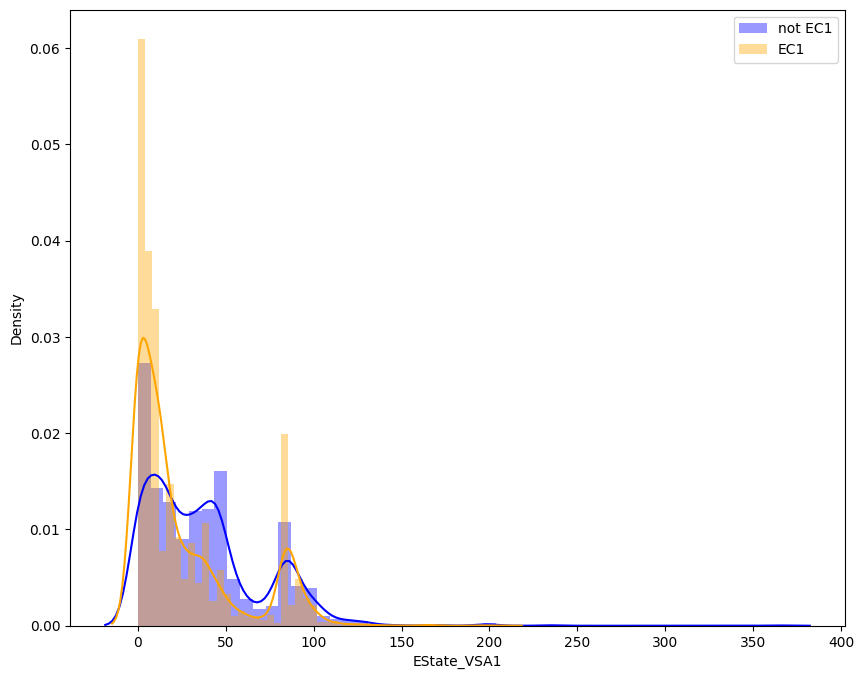

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

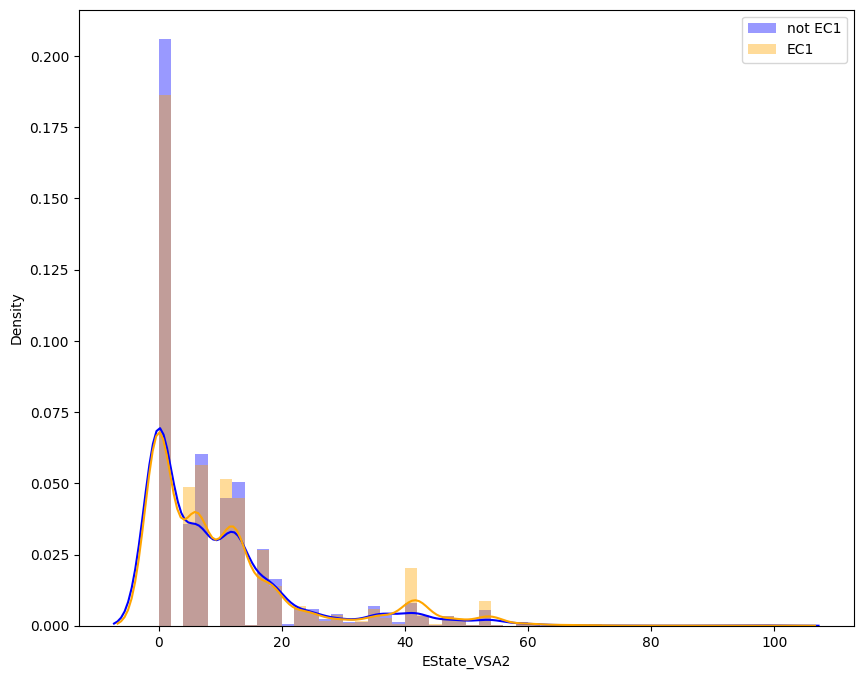

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

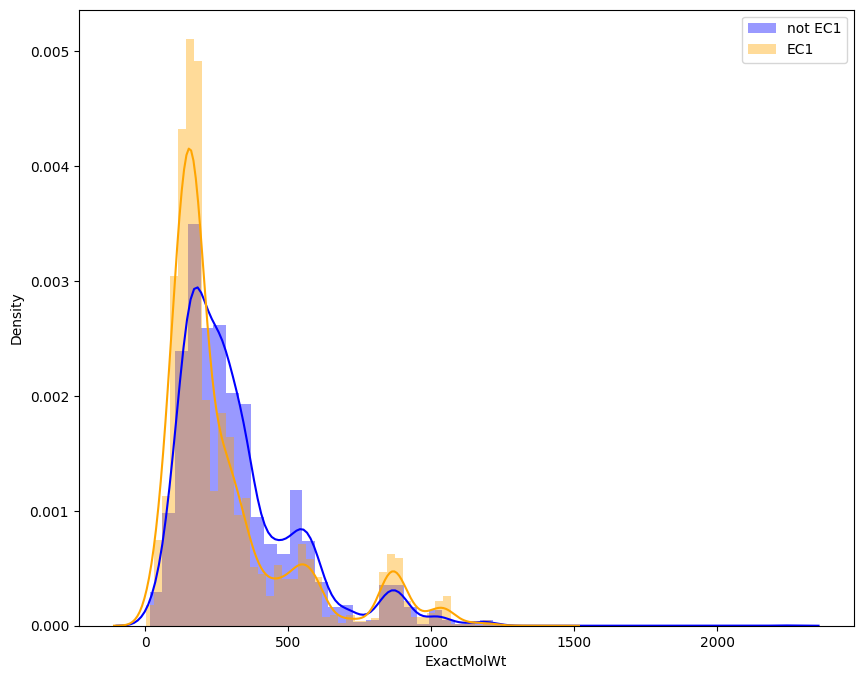

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

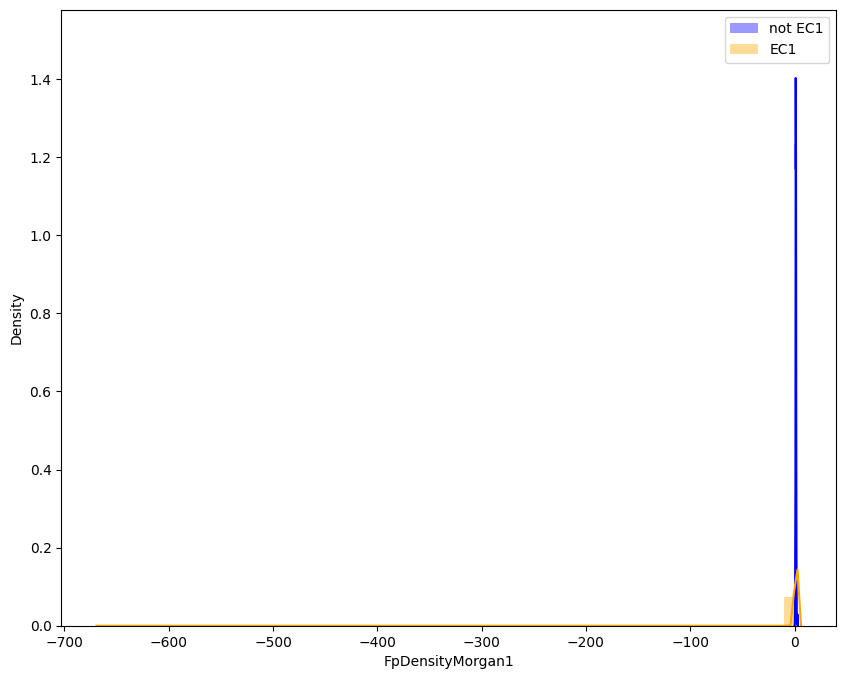

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

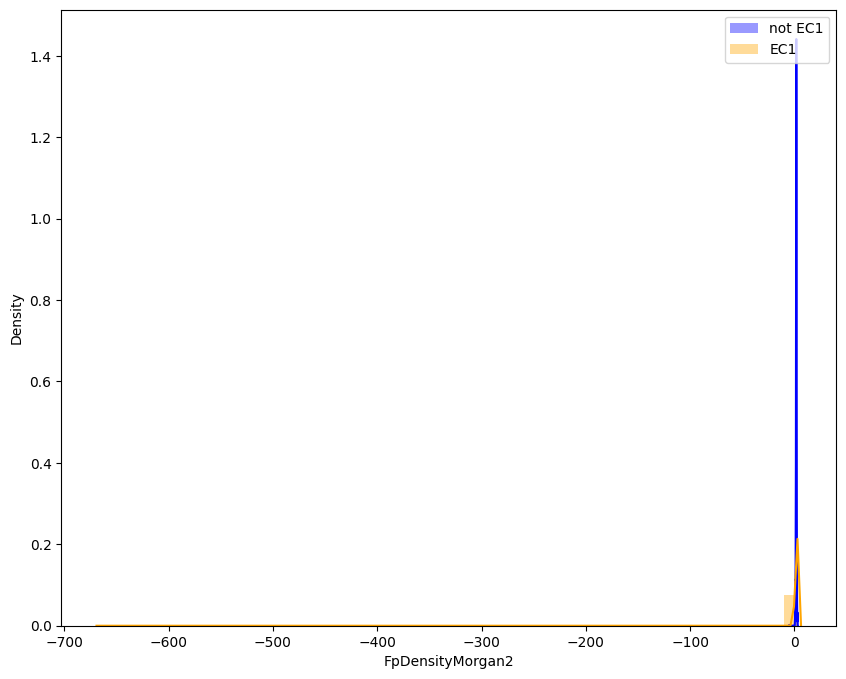

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

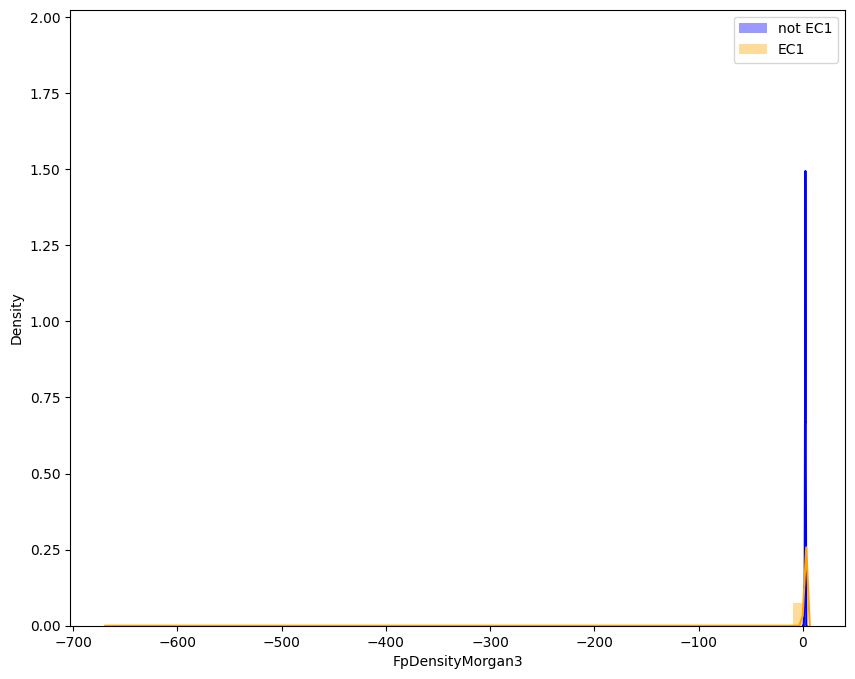

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

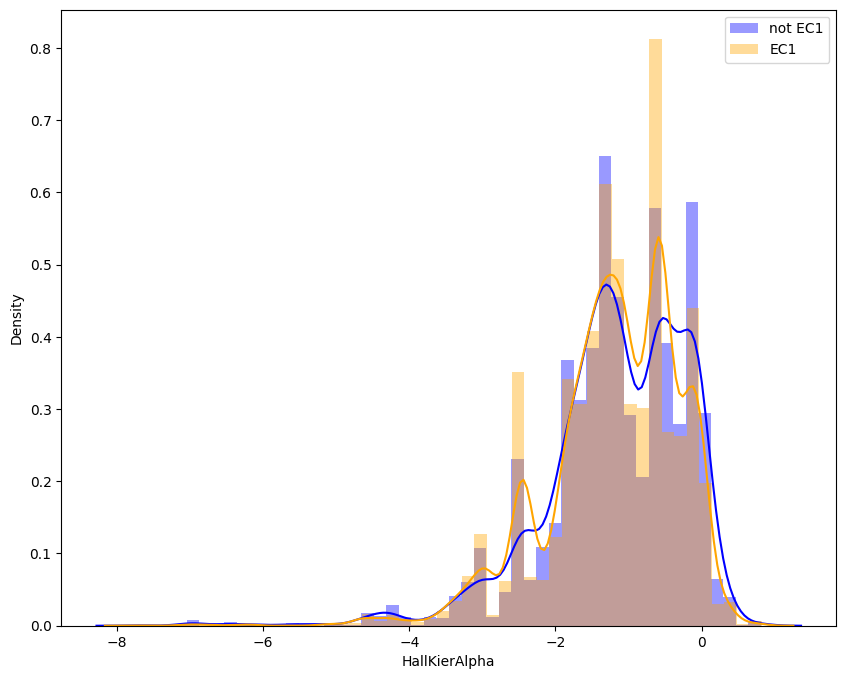

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

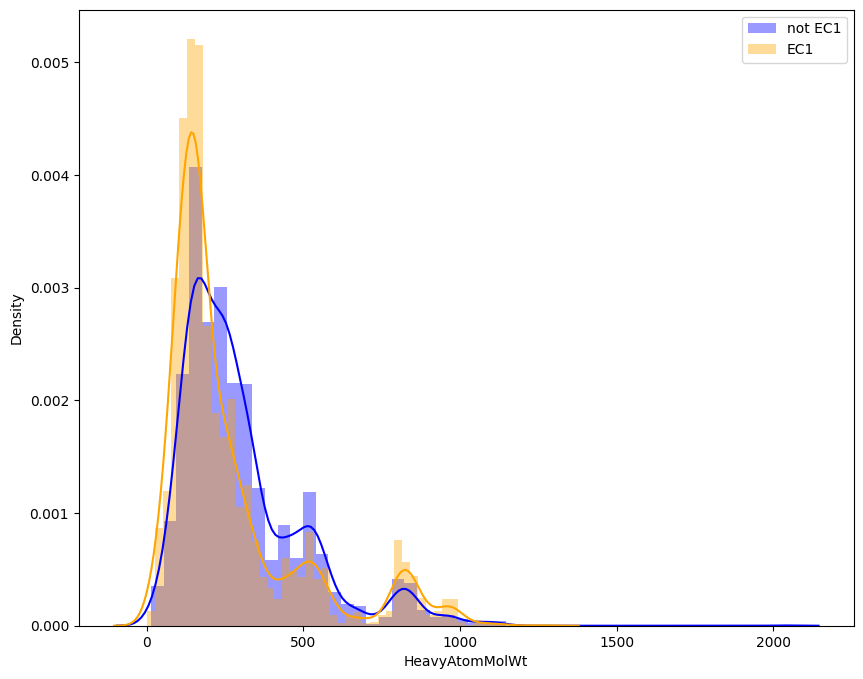

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

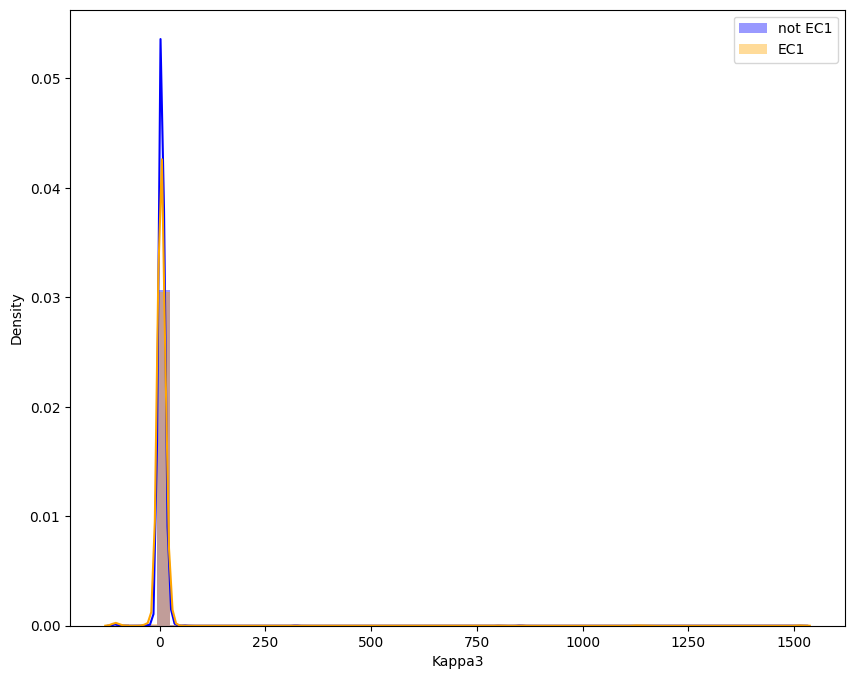

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

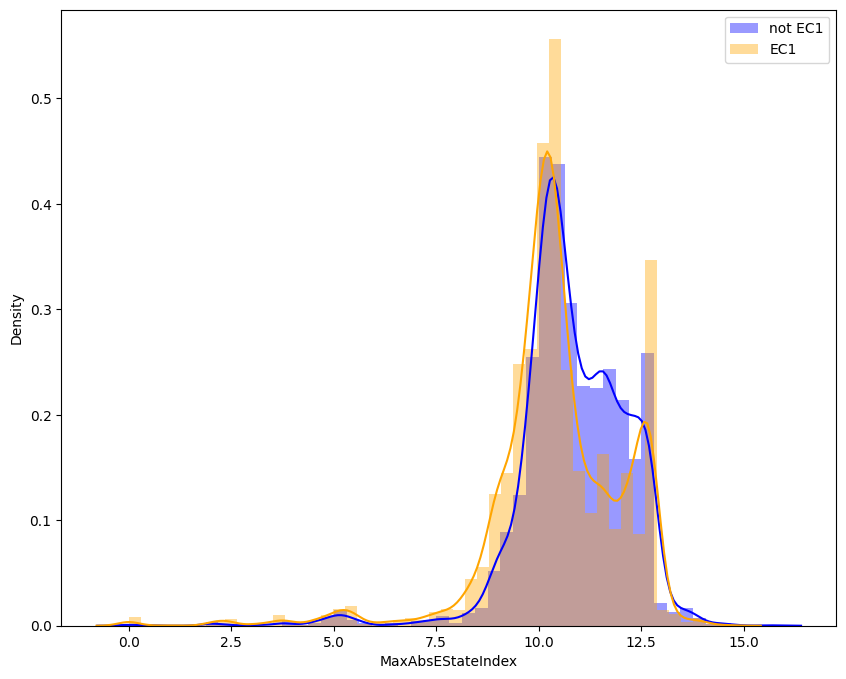

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

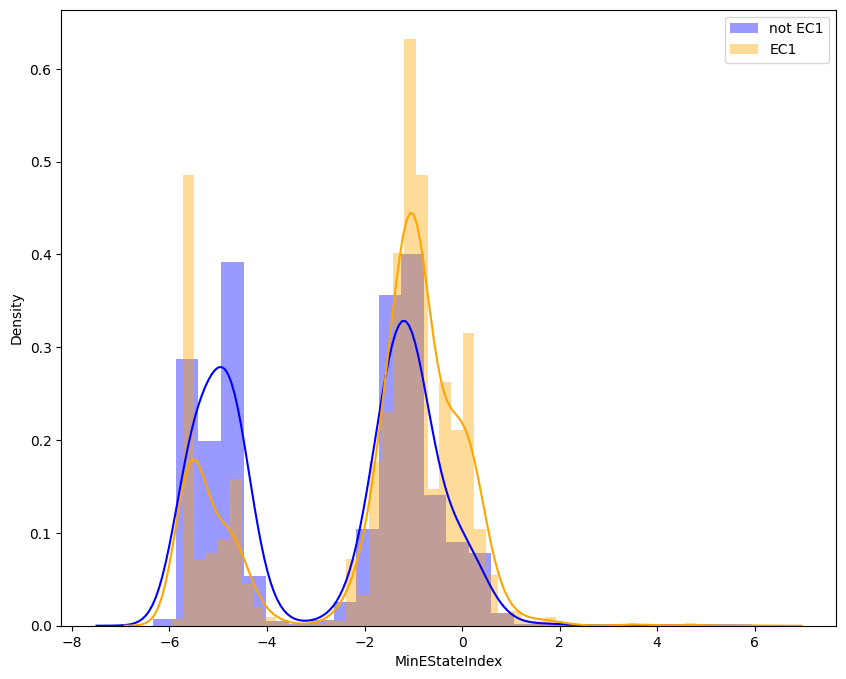

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

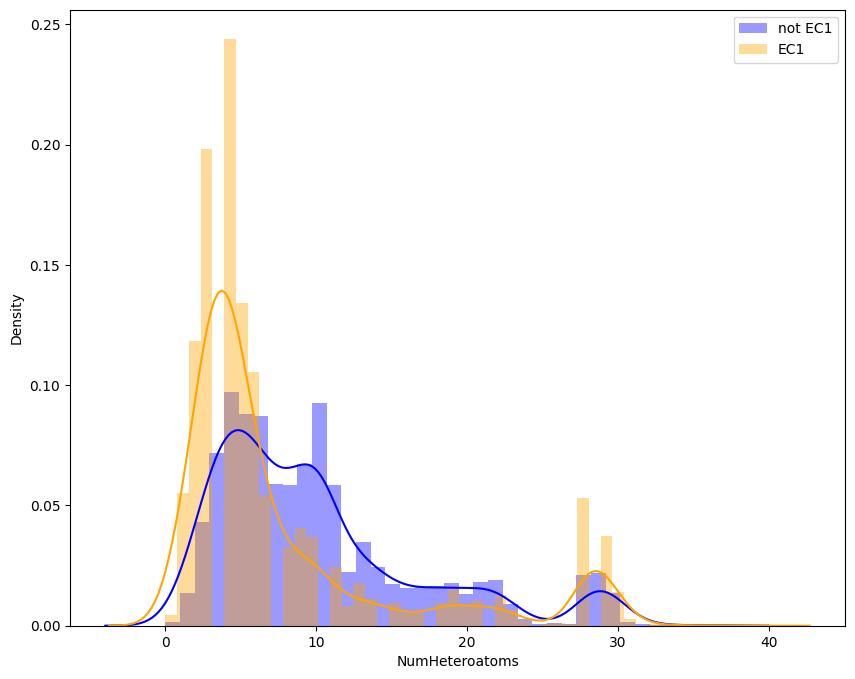

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

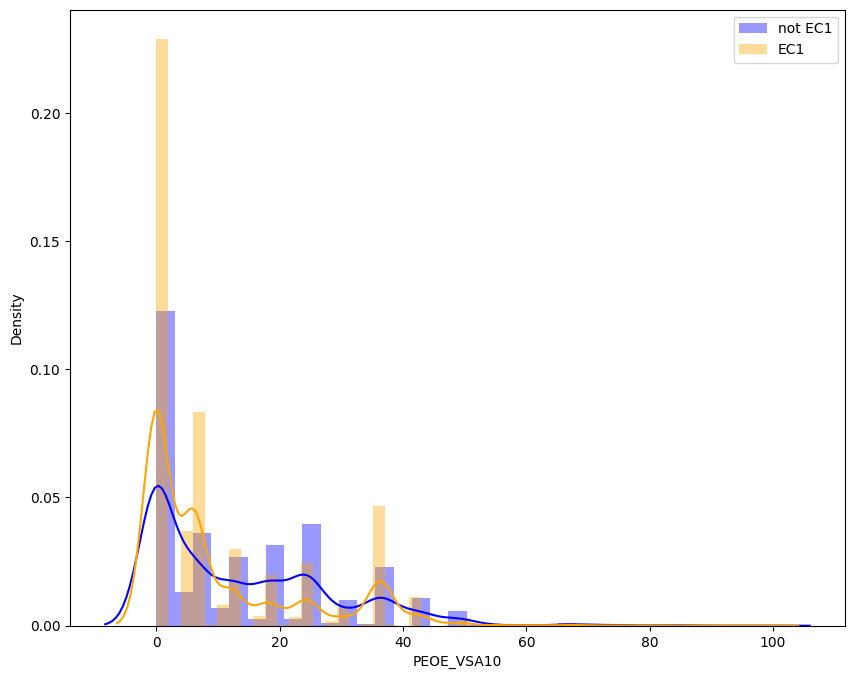

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

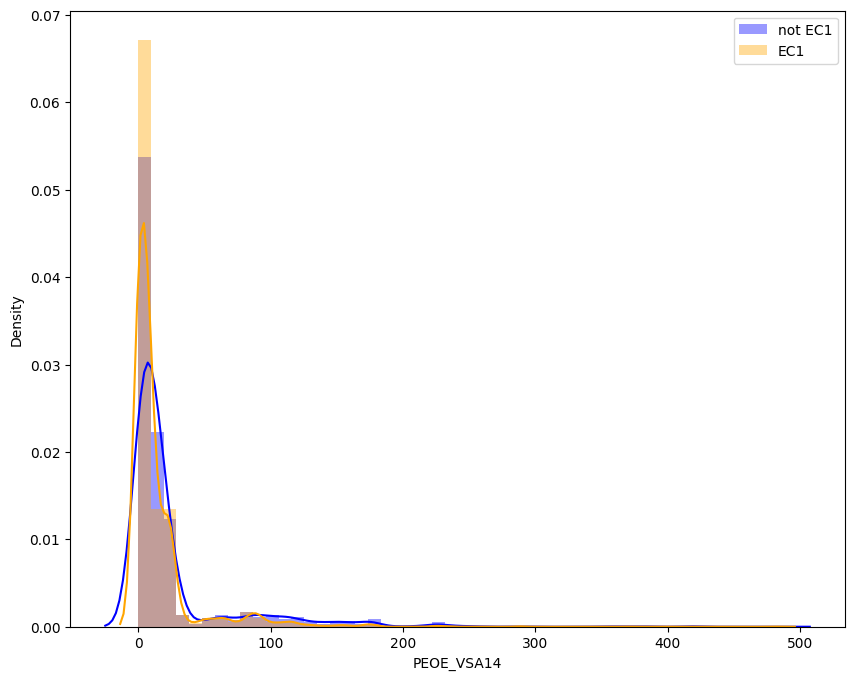

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

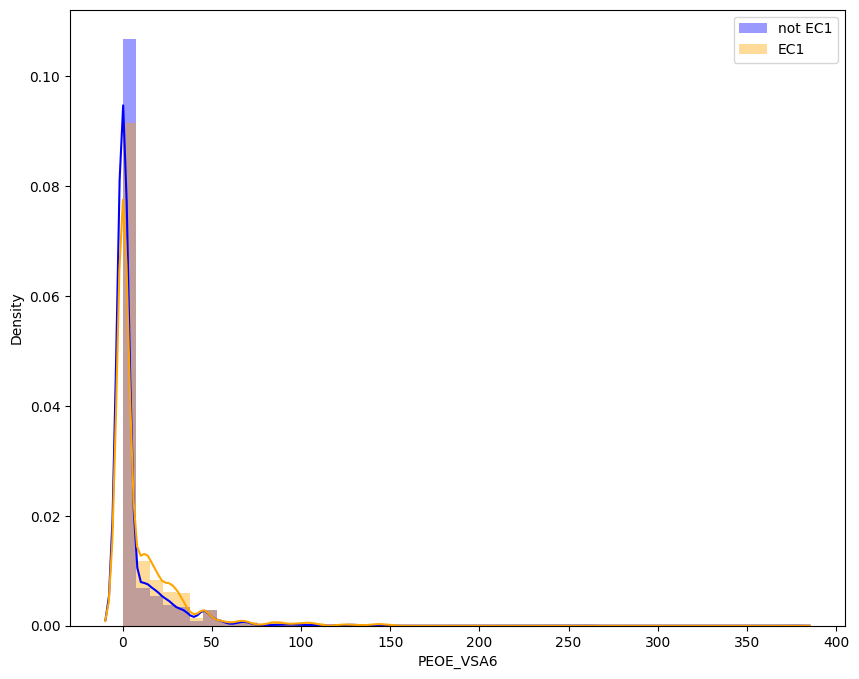

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

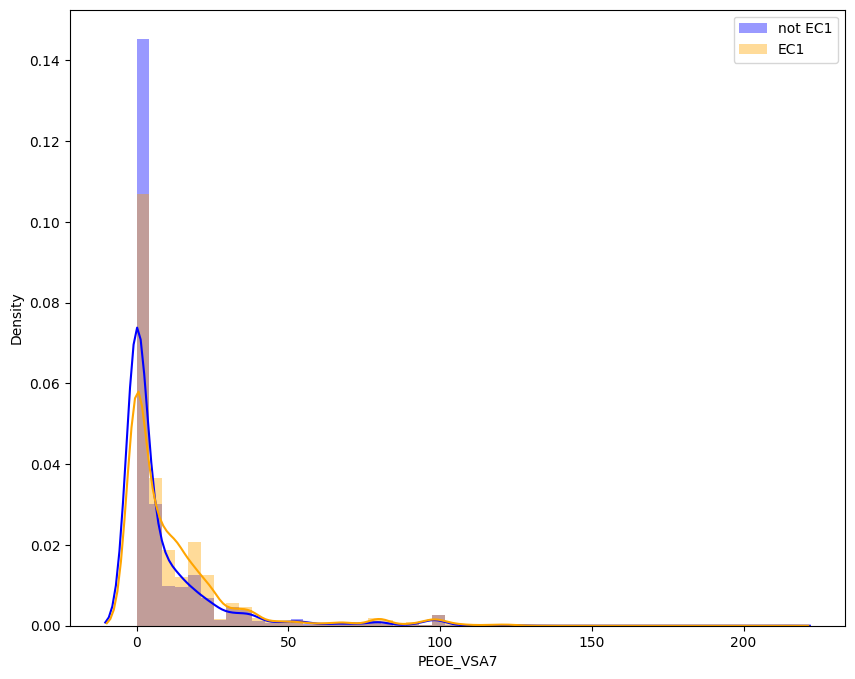

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

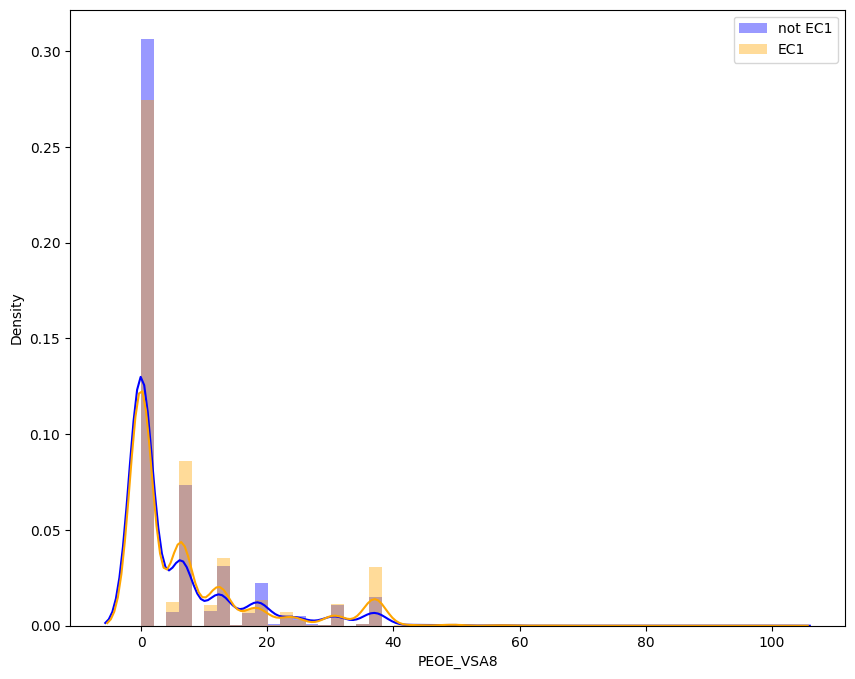

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

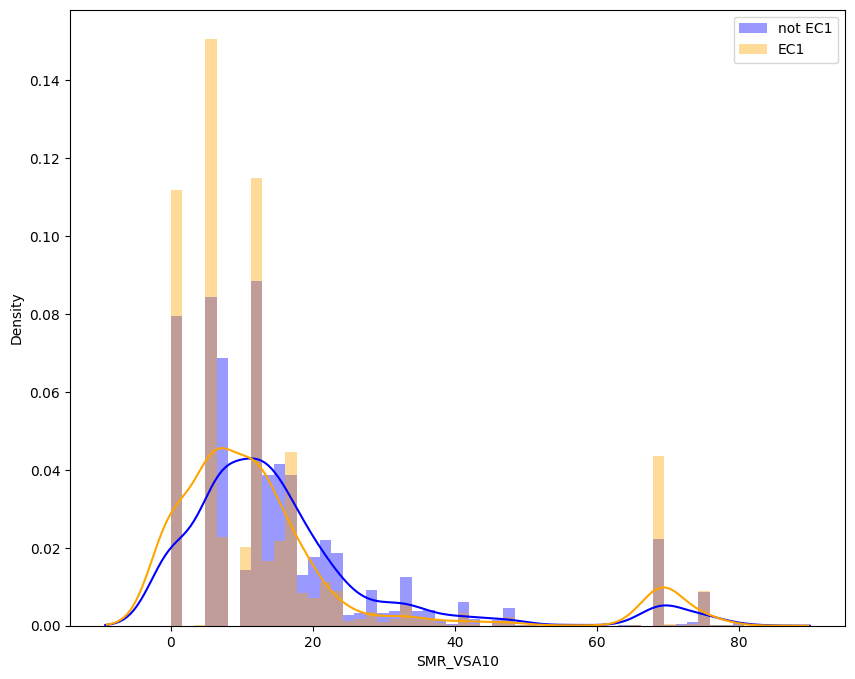

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

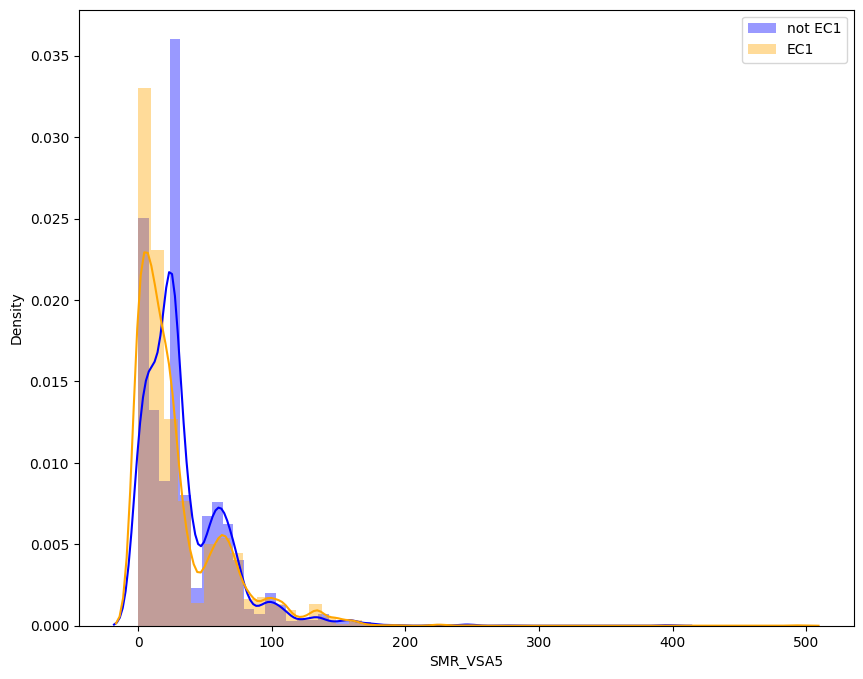

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

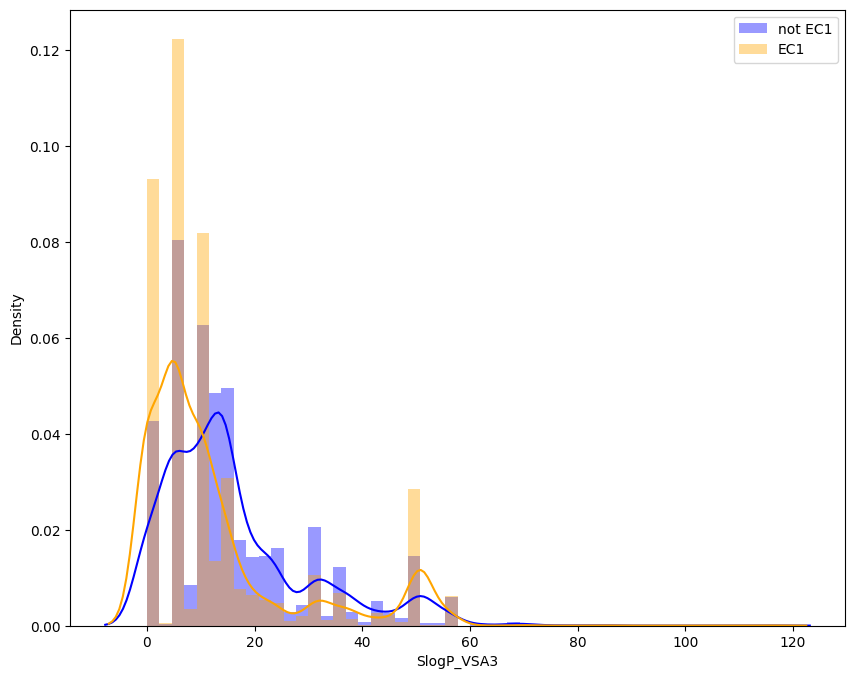

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

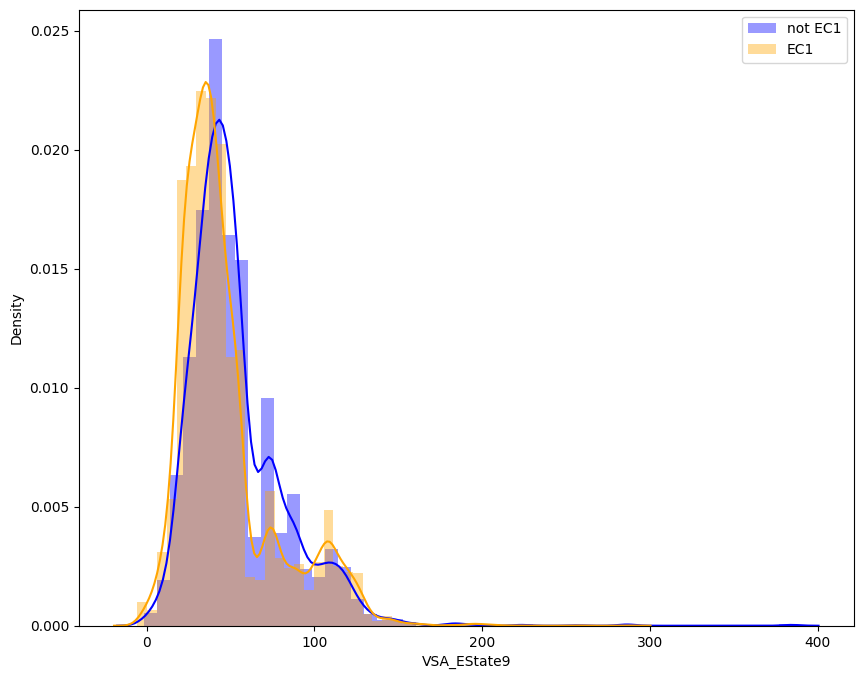

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

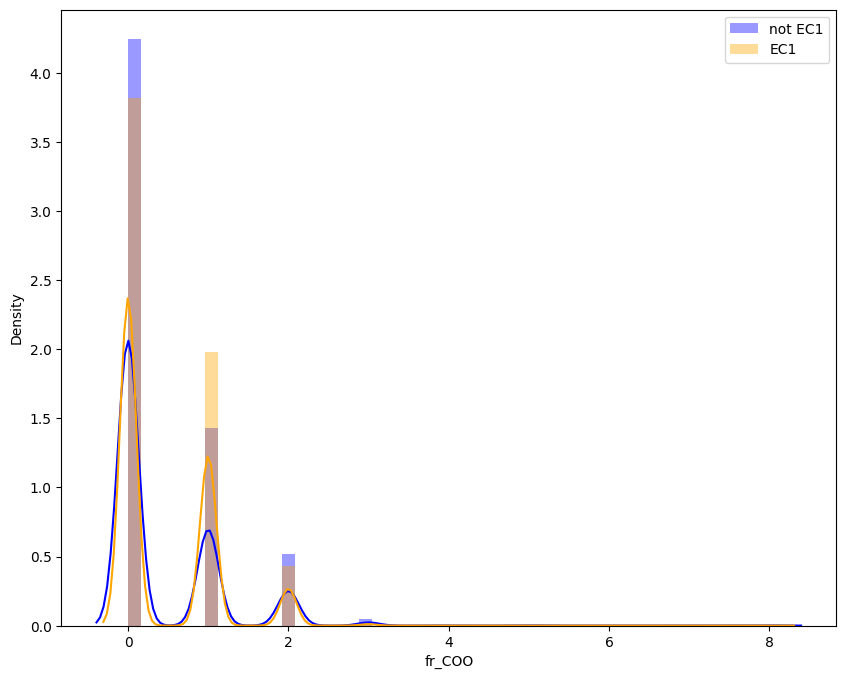

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\432853914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

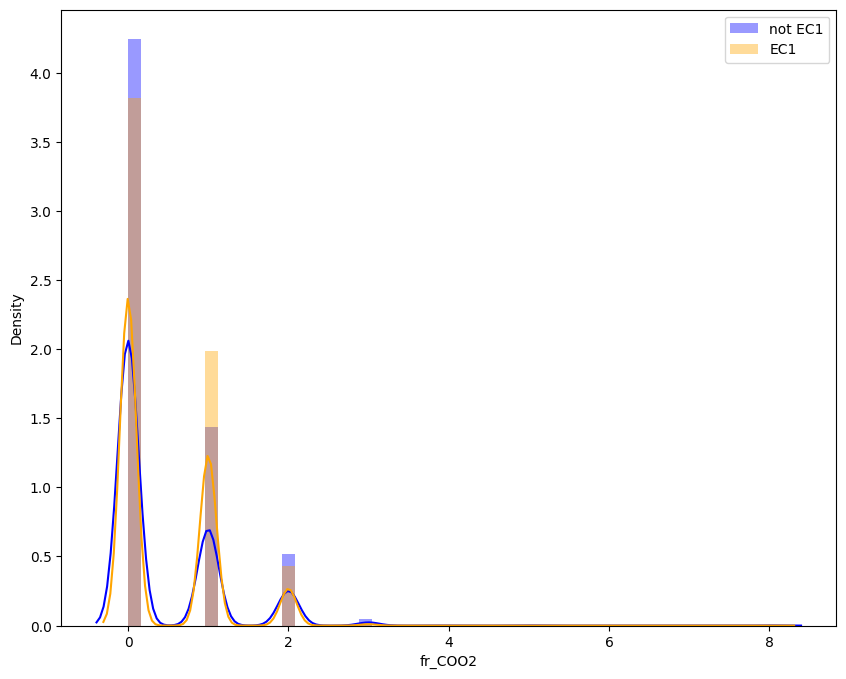

In [8]:
for feature in features:
    plt.figure(figsize=(10,8))
    sns.distplot(train_df.loc[train_df['EC1']==0,feature],kde=True,color='blue',label='not EC1')
    sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='orange',label='EC1')
    plt.legend(loc='upper right')
    plt.show()

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

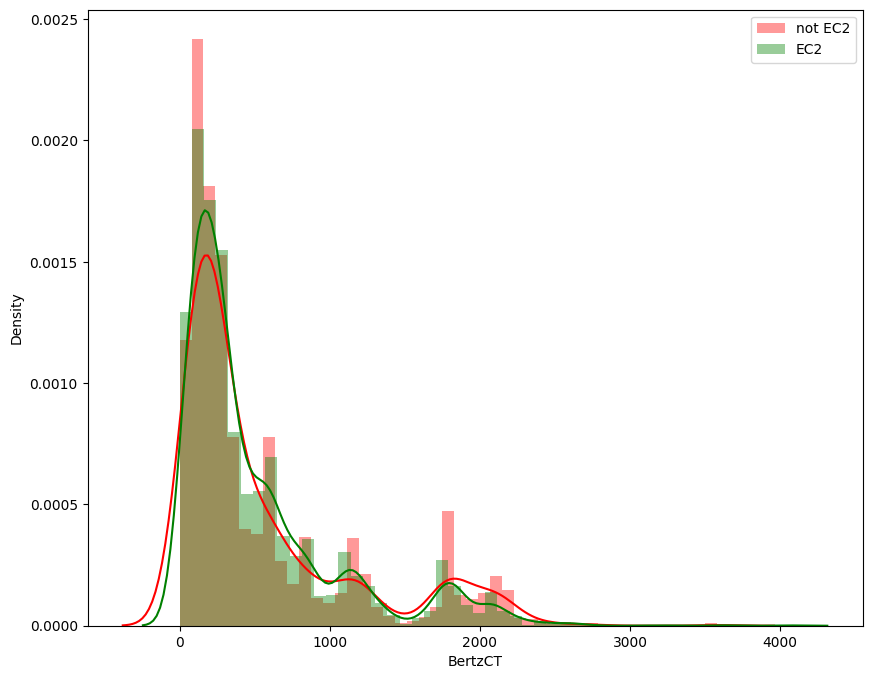

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

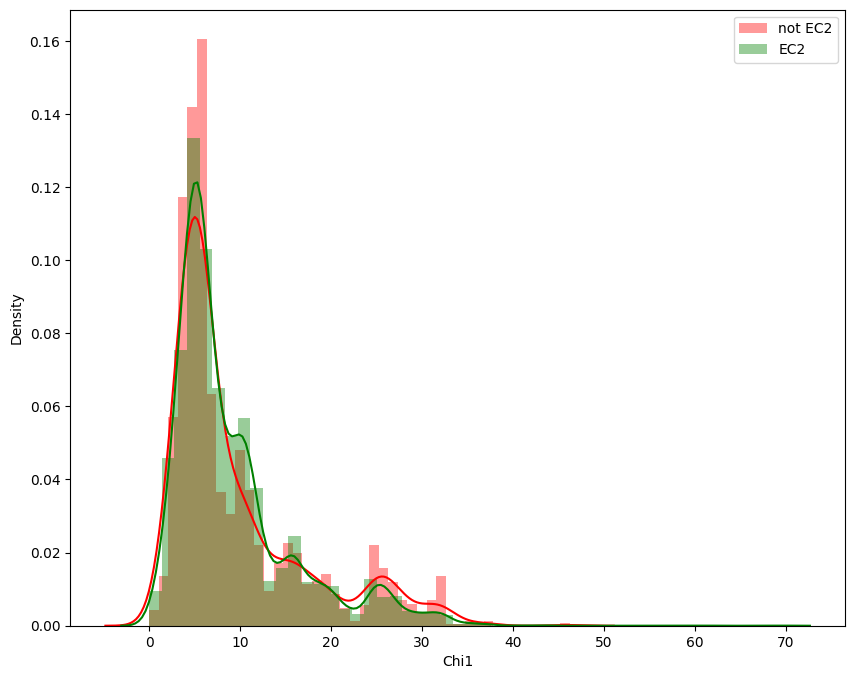

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

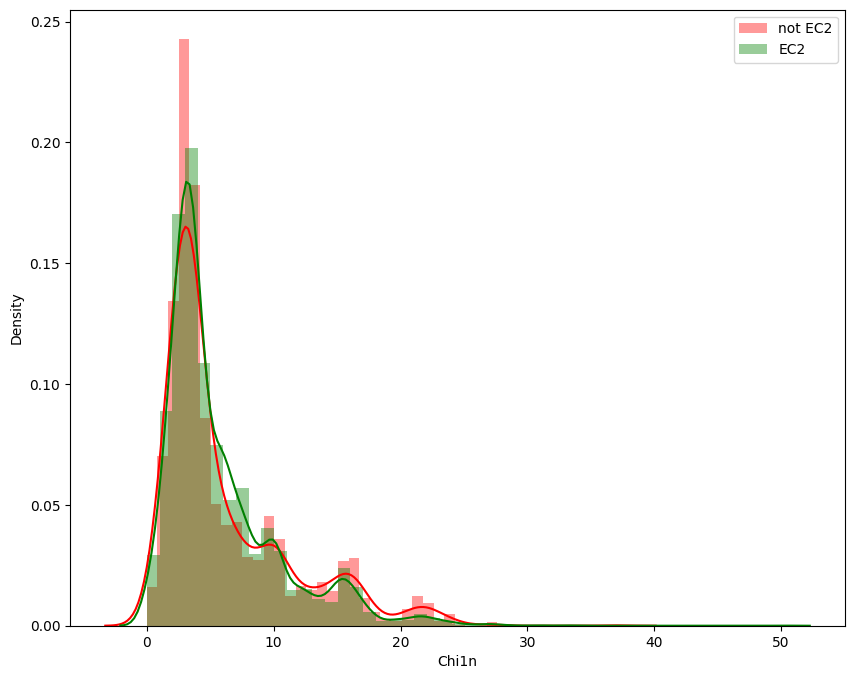

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

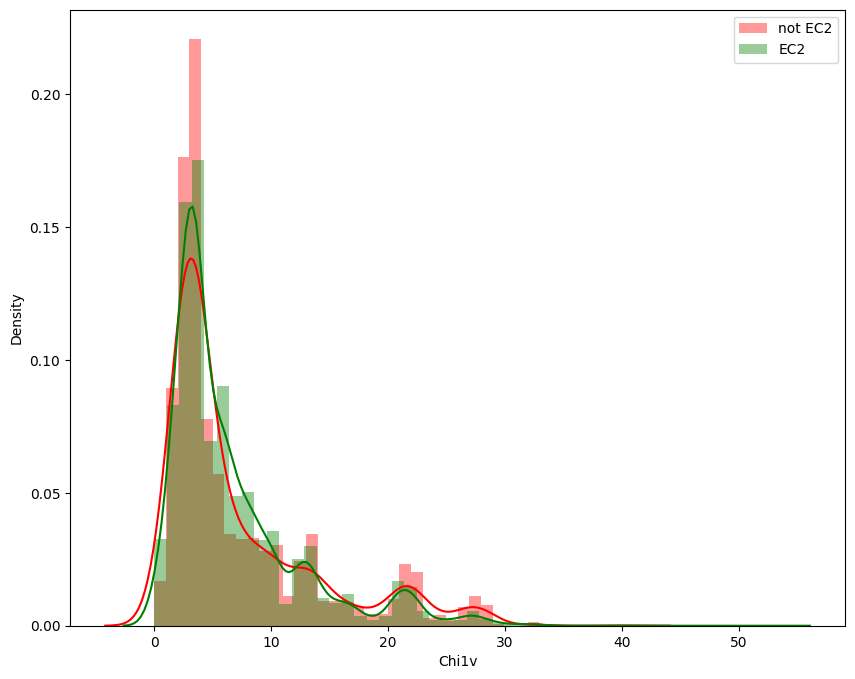

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

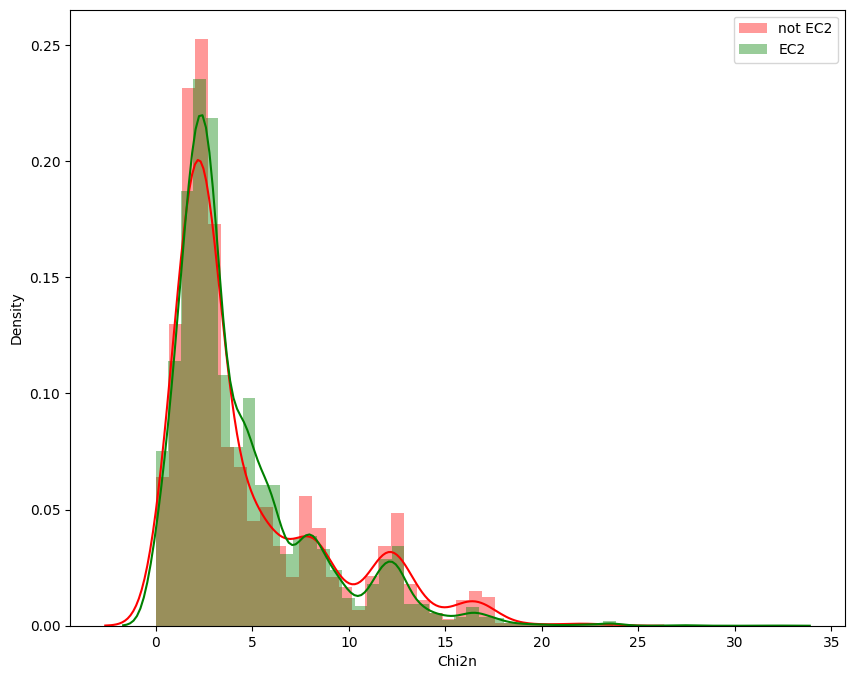

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

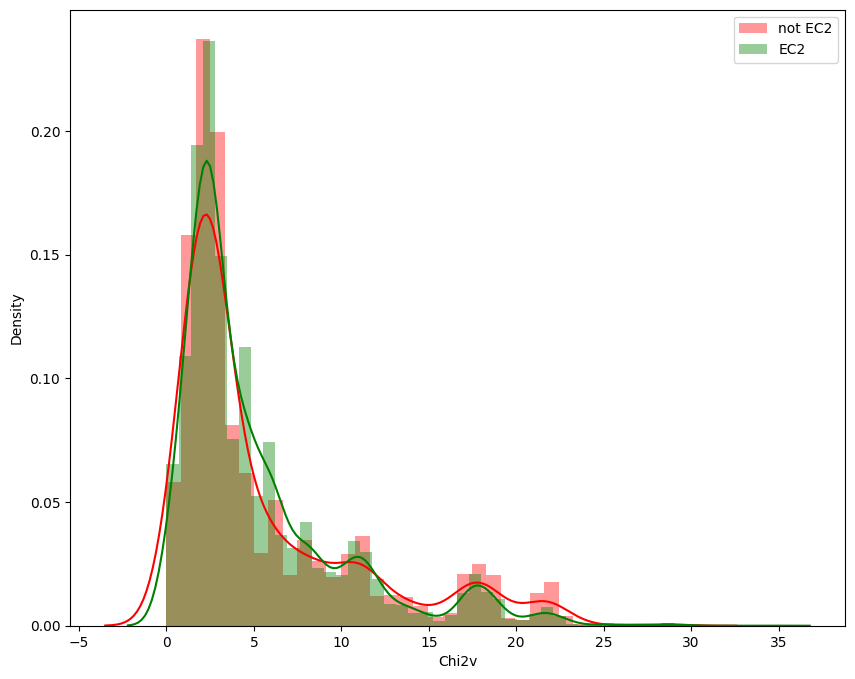

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

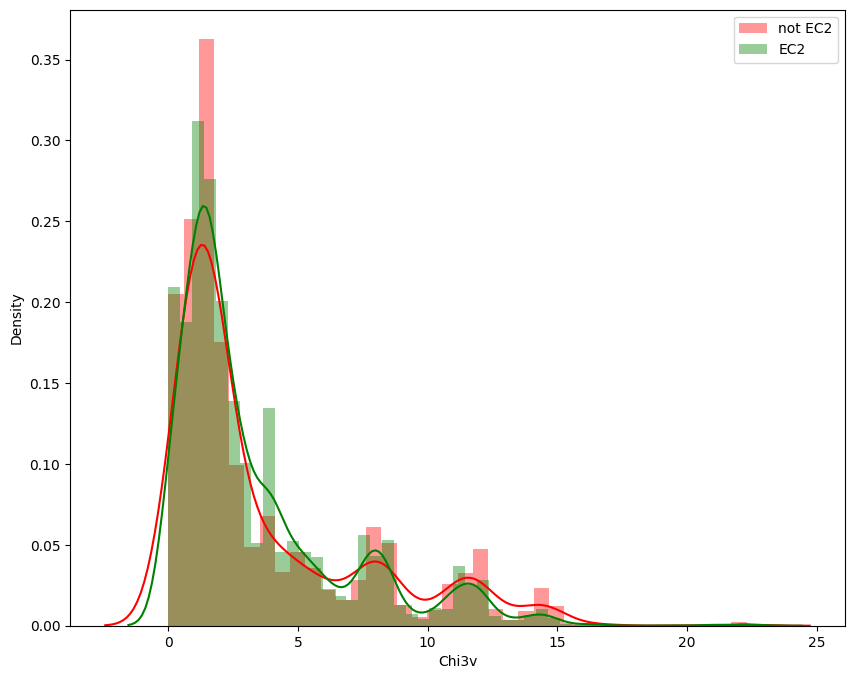

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

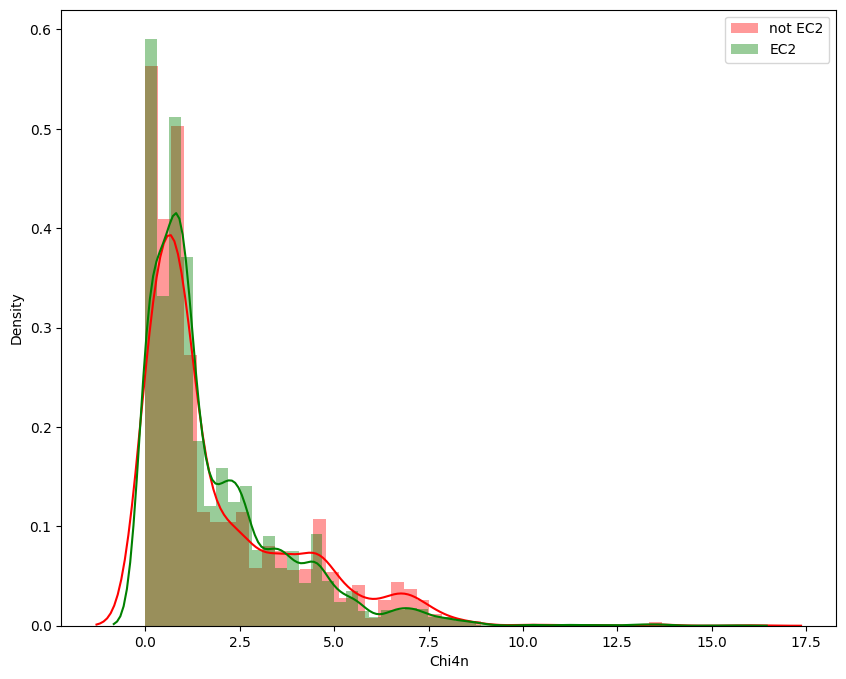

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

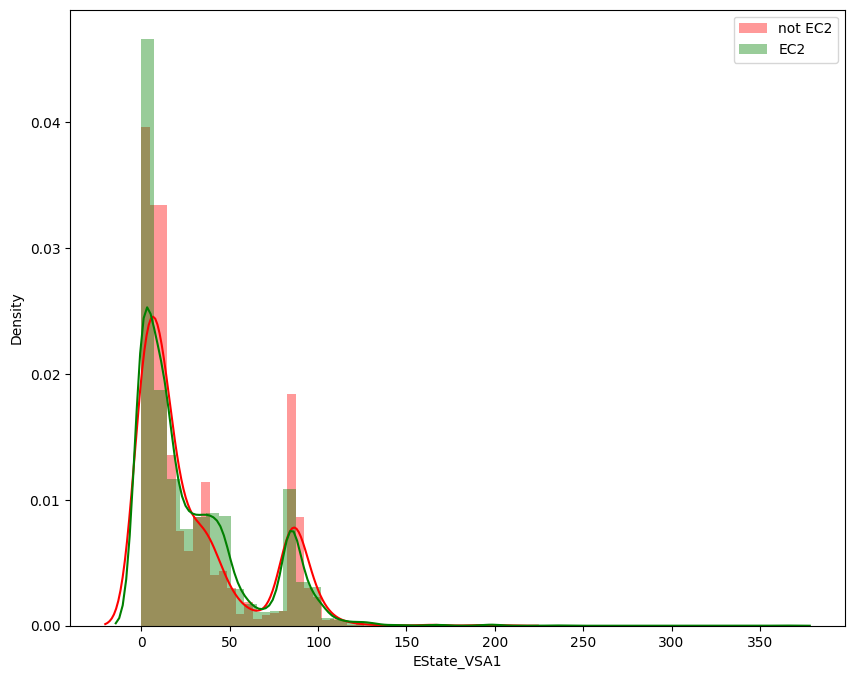

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

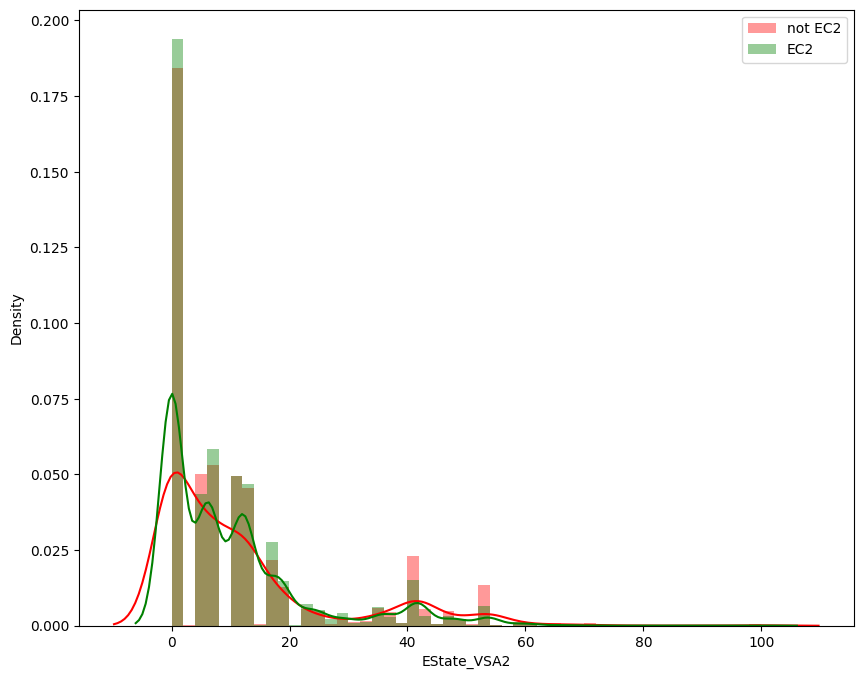

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

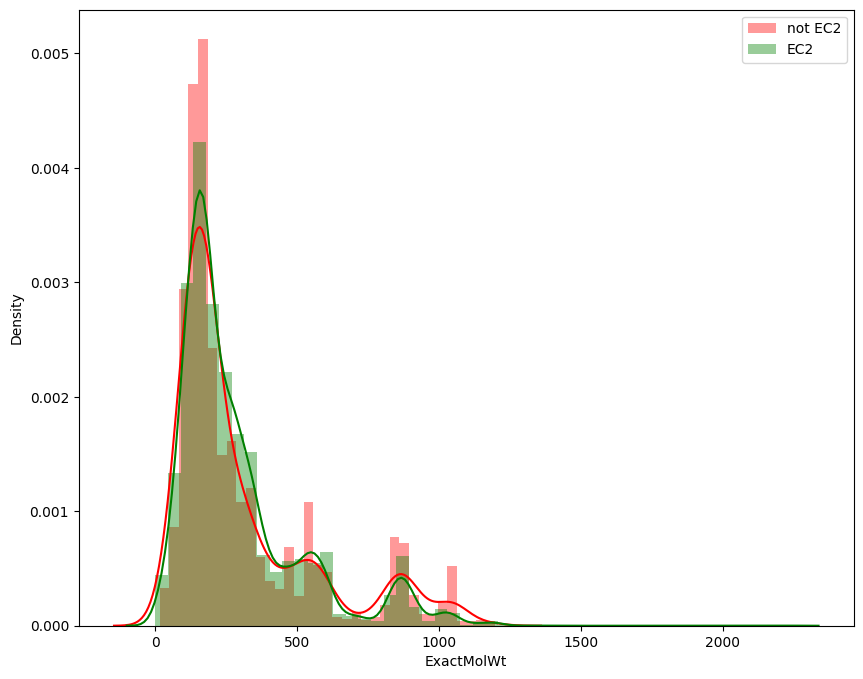

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

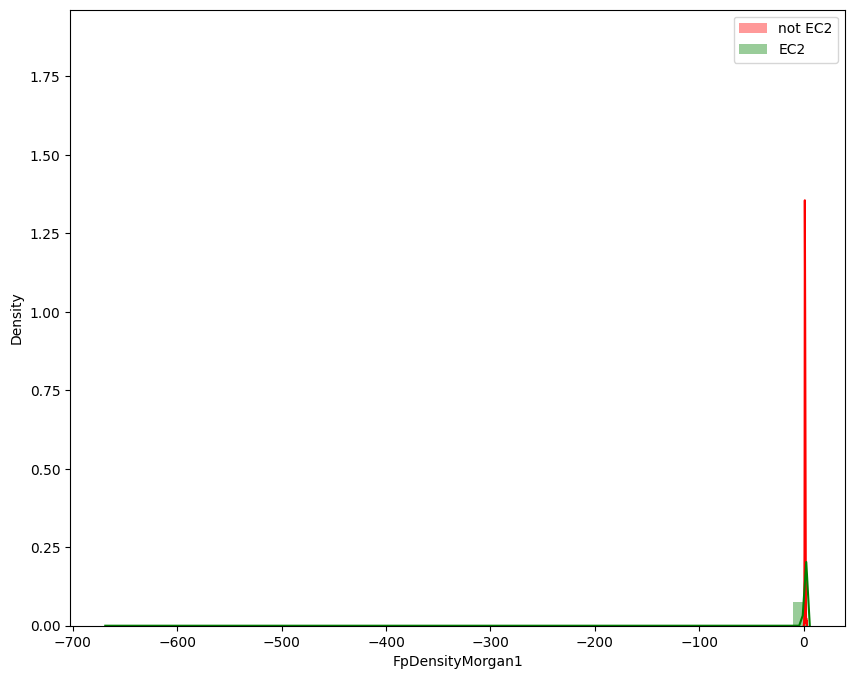

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

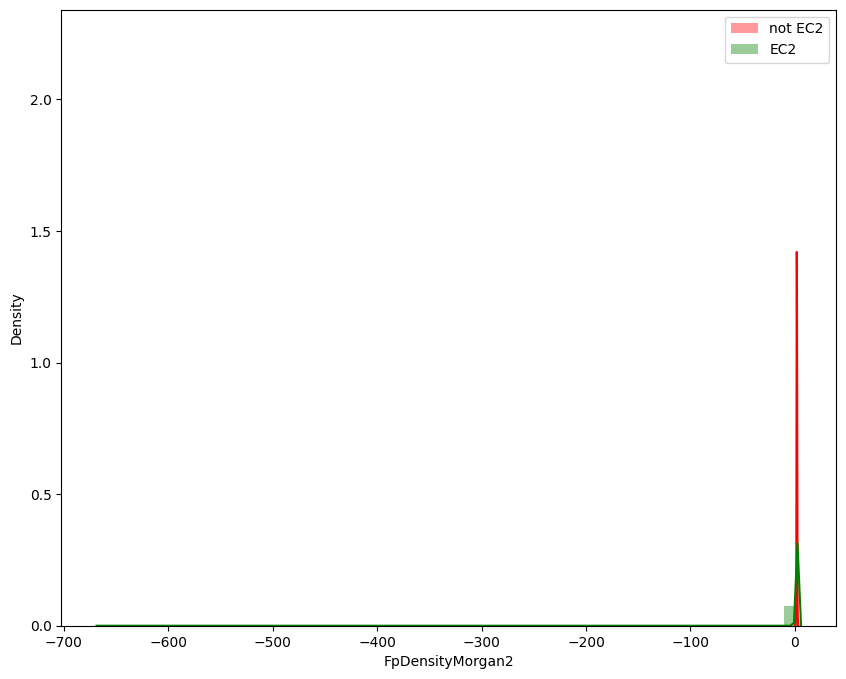

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

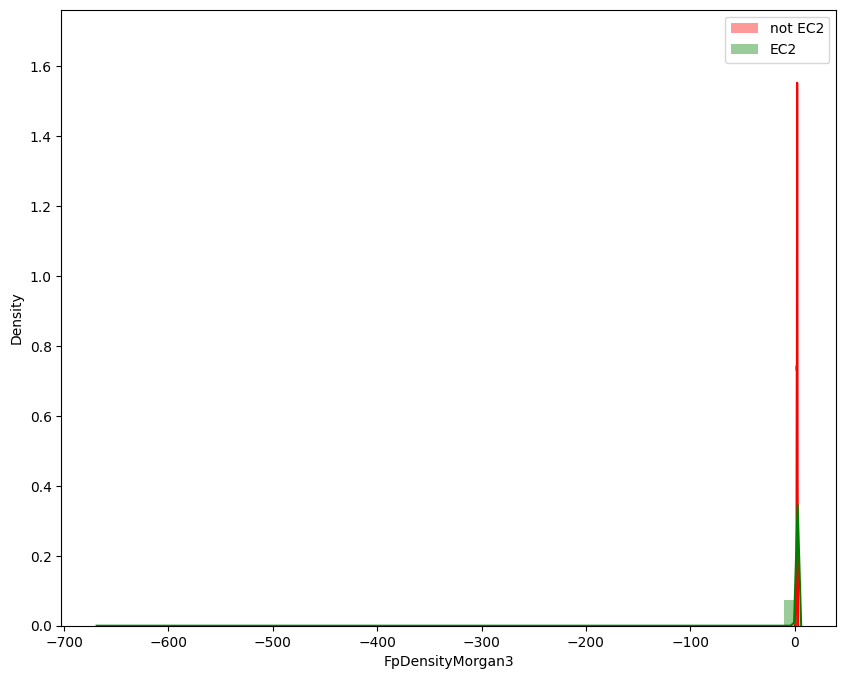

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

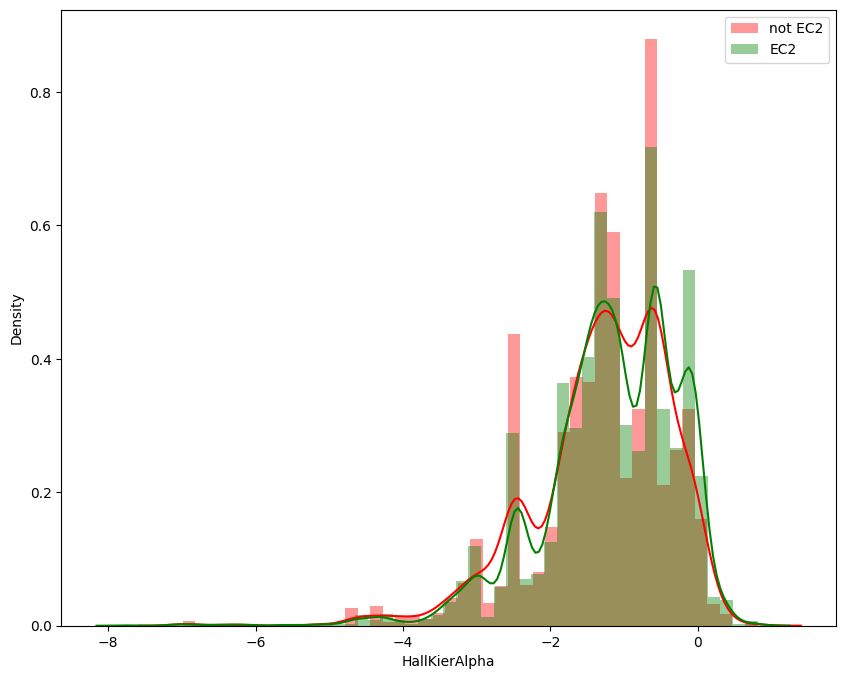

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

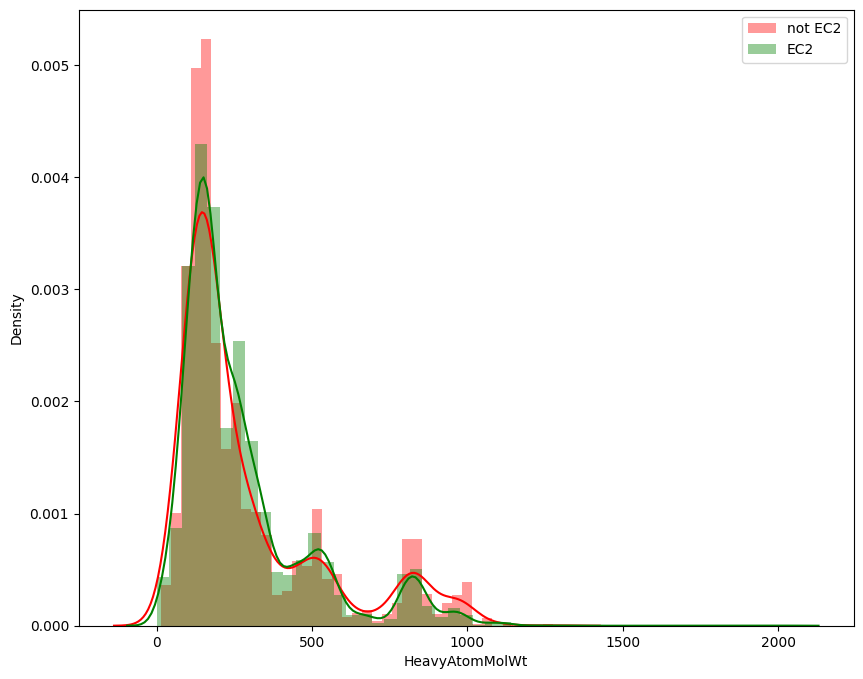

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

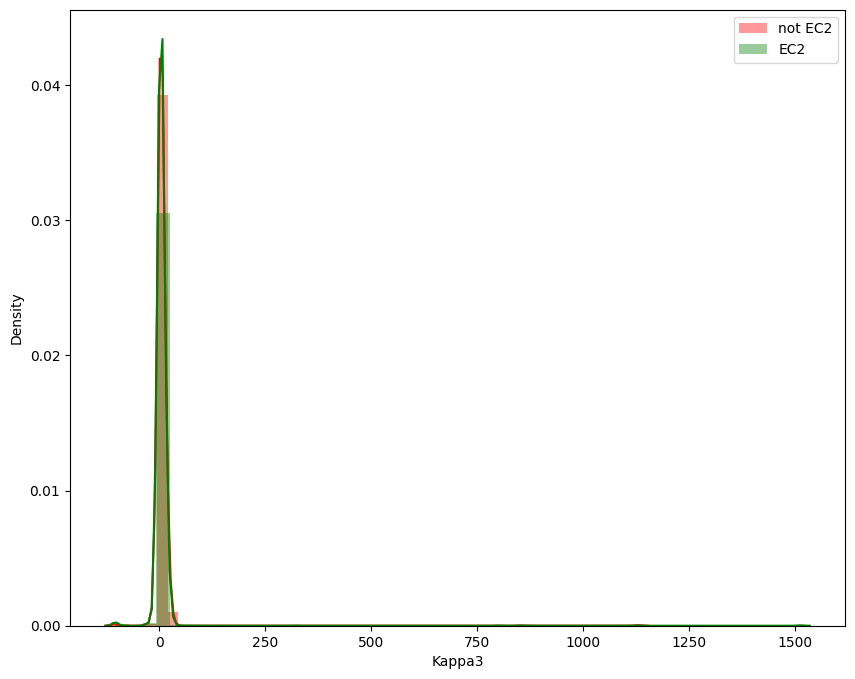

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

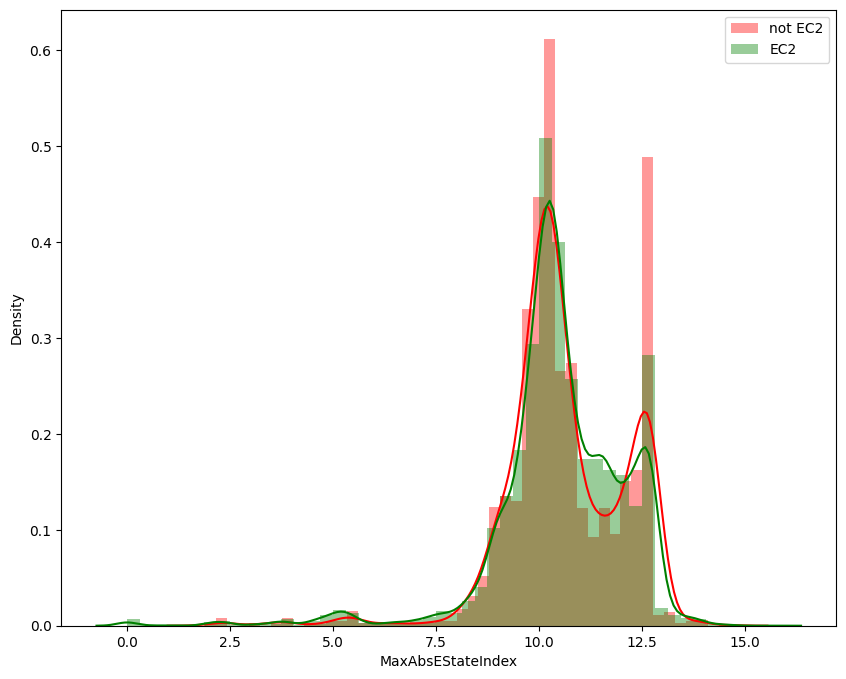

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

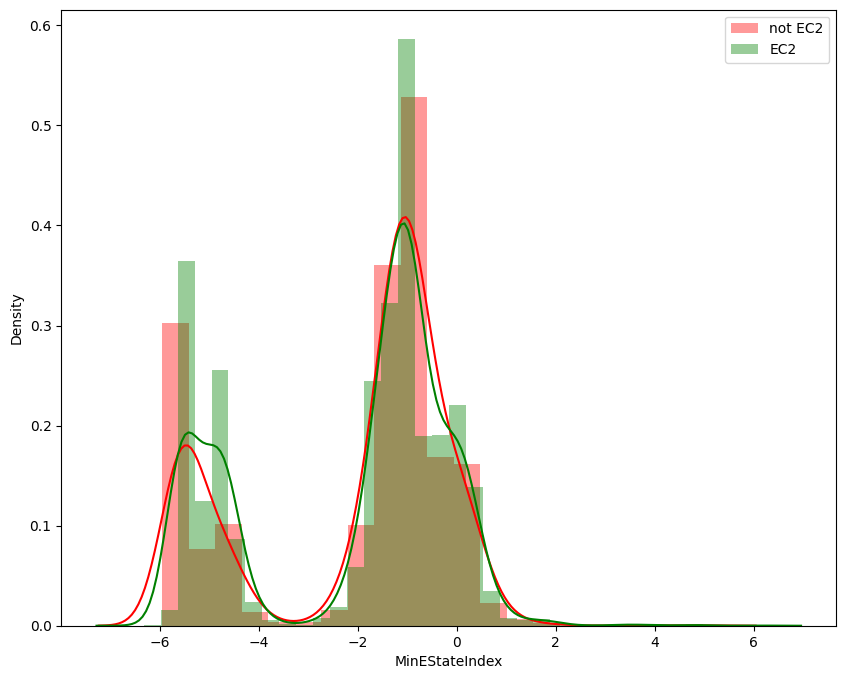

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

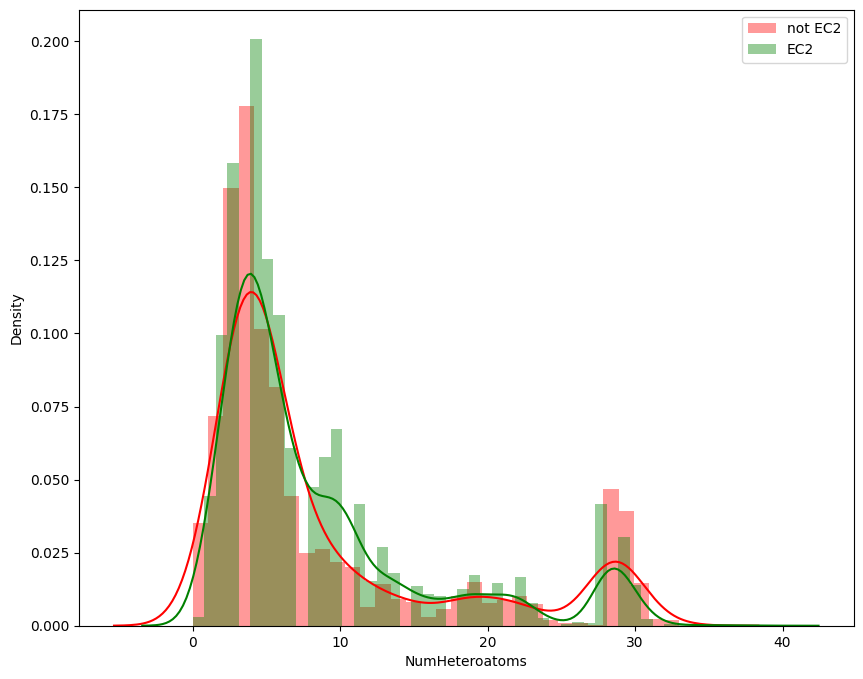

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

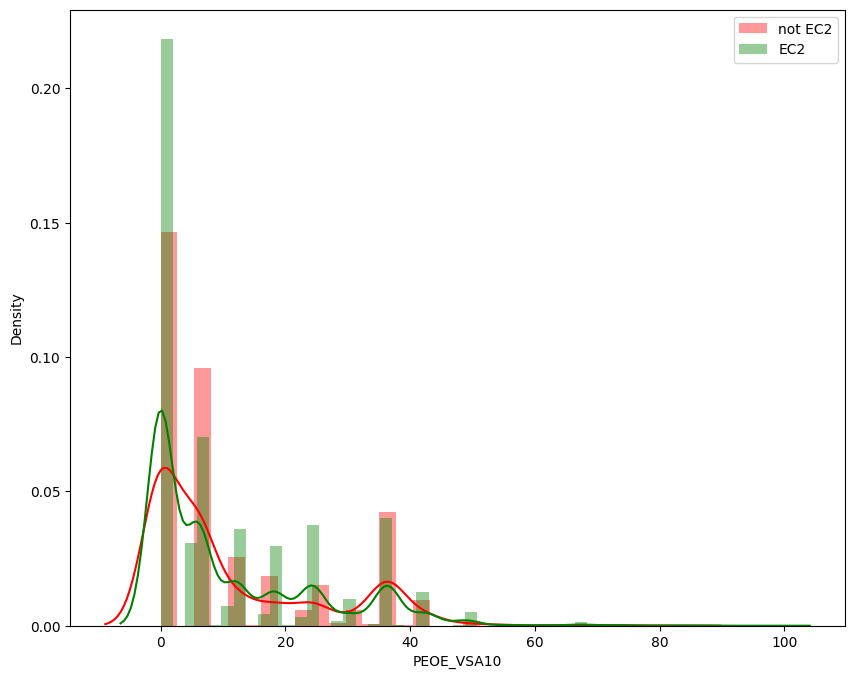

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

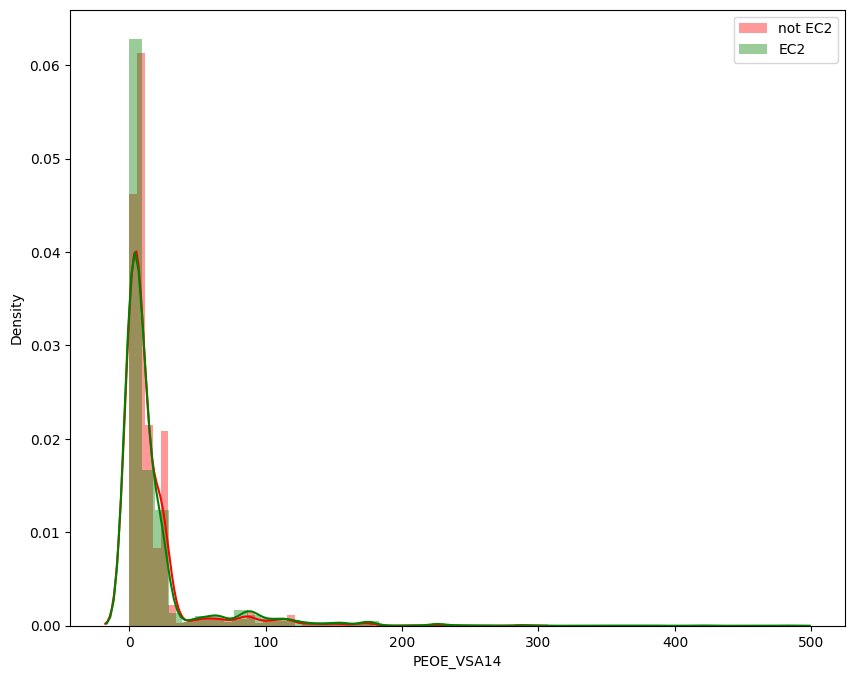

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

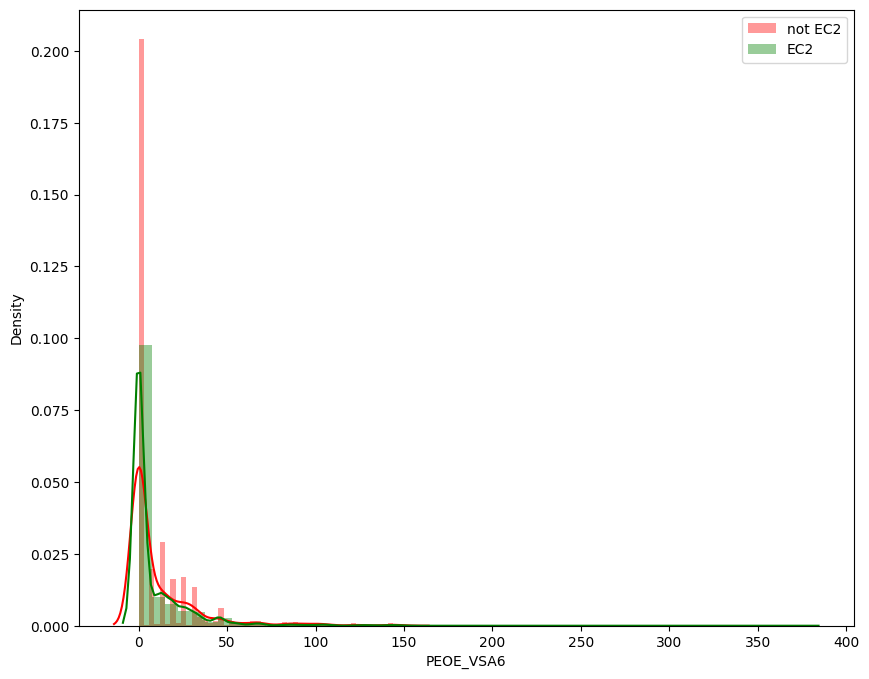

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

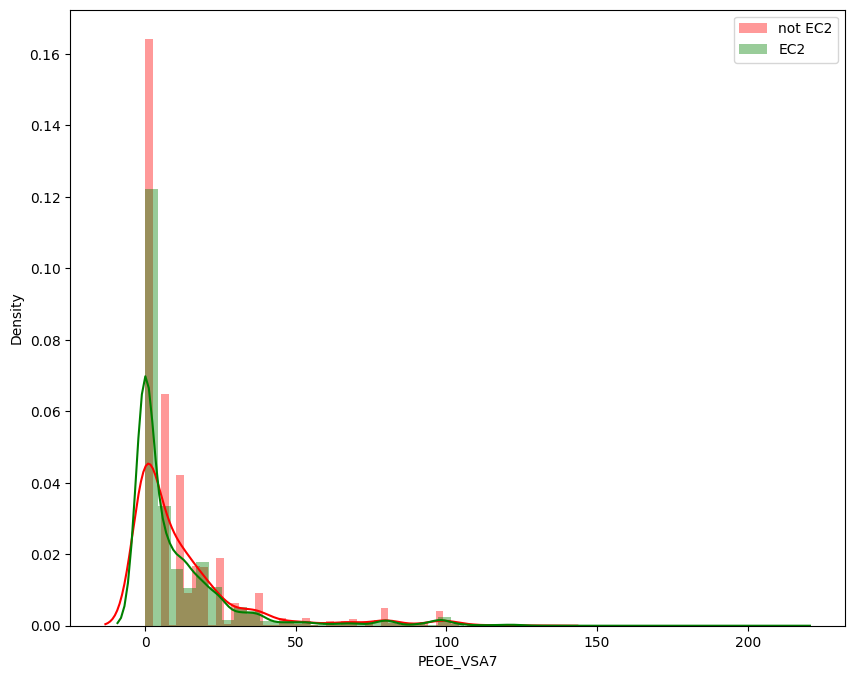

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

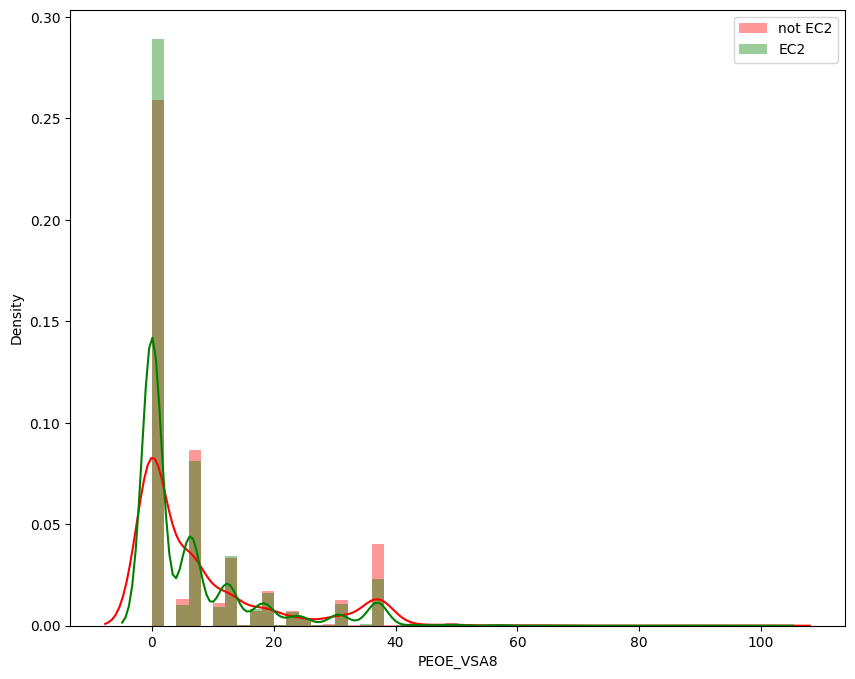

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

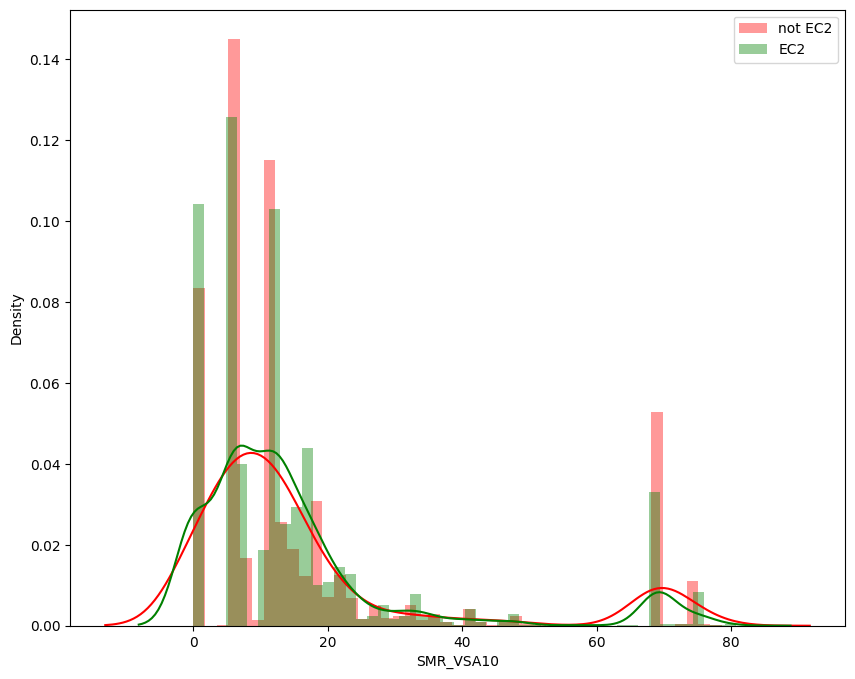

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

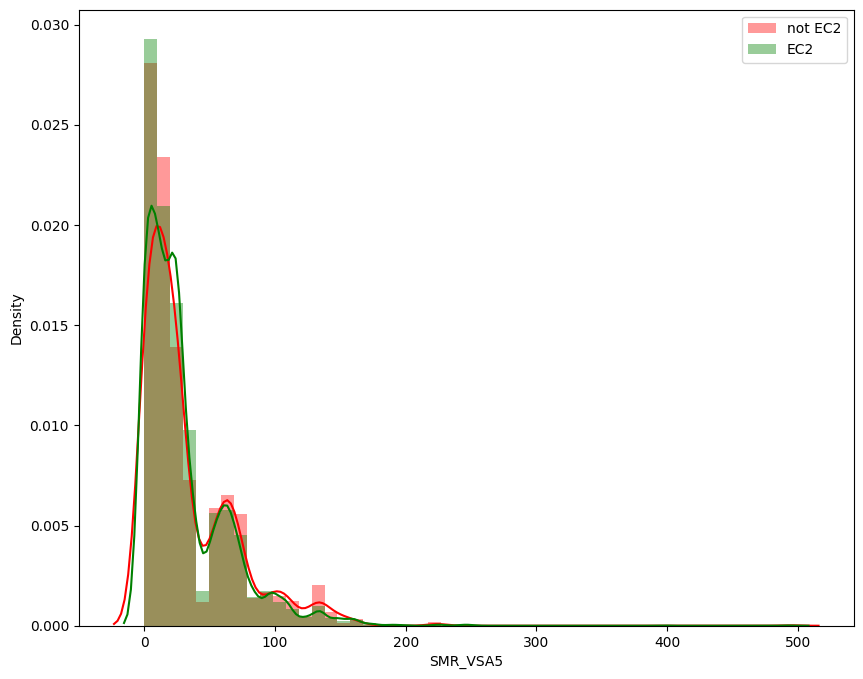

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

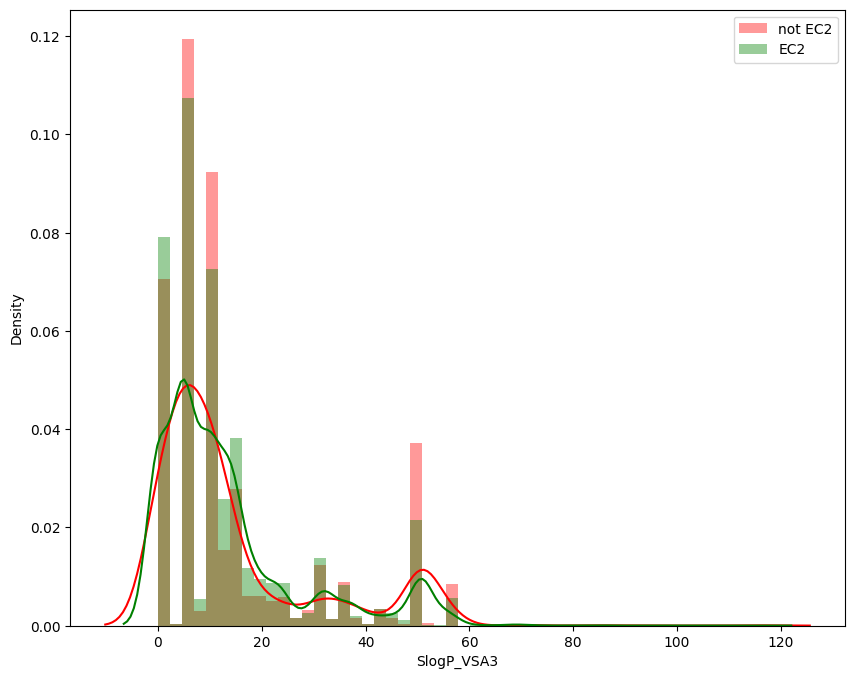

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

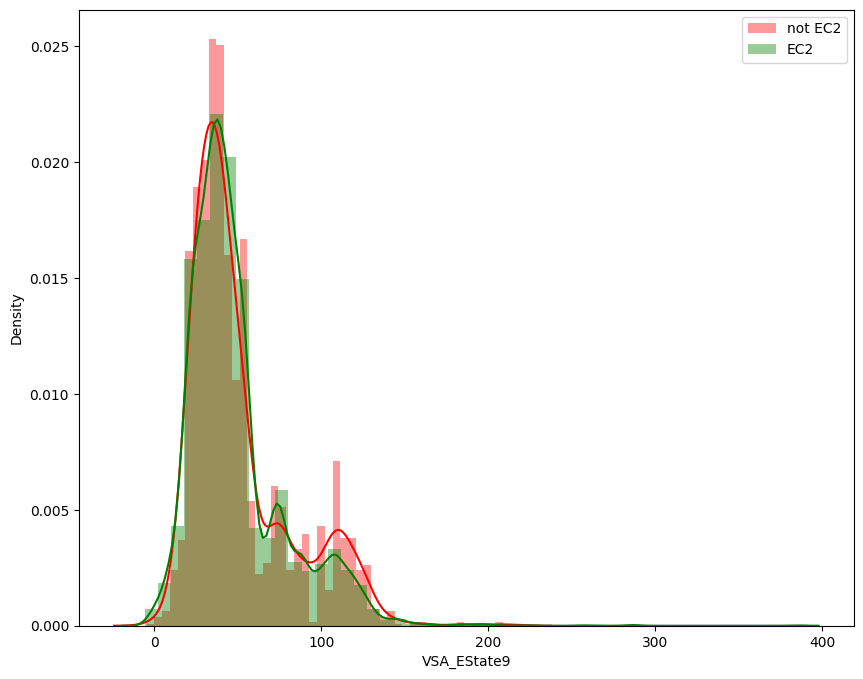

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

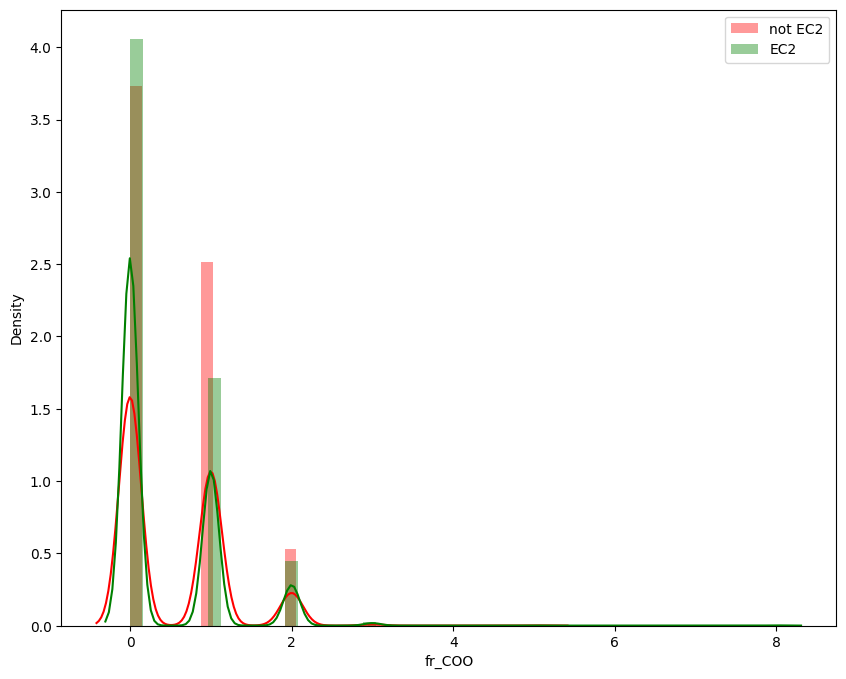

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\3503710012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

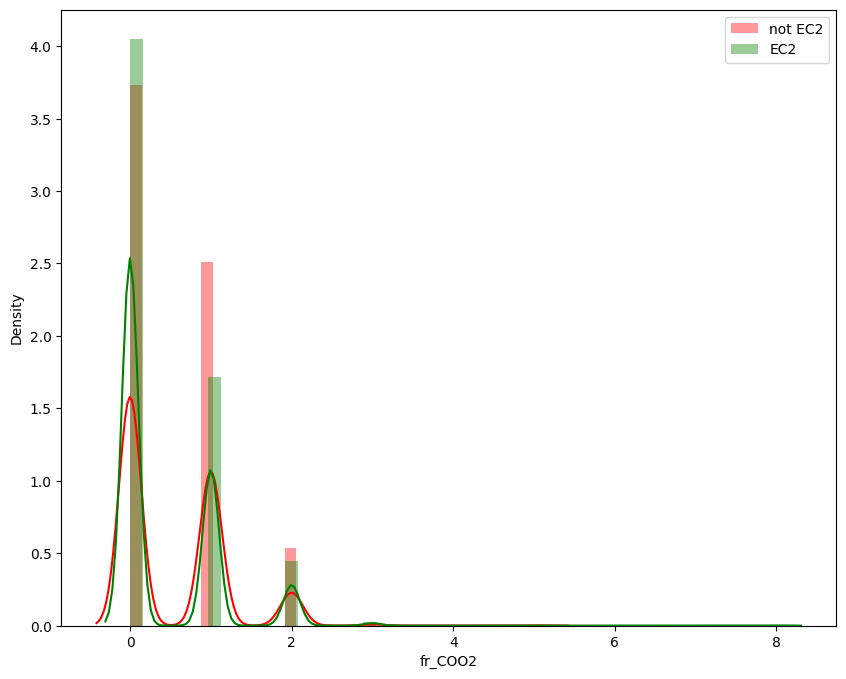

In [9]:
for feature in features:
    plt.figure(figsize=(10,8))
    sns.distplot(train_df.loc[train_df['EC2']==0,feature],kde=True,color='red',label='not EC2')
    sns.distplot(train_df.loc[train_df['EC2']==1,feature],kde=True,color='green',label='EC2')
    plt.legend(loc='upper right')
    plt.show()

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

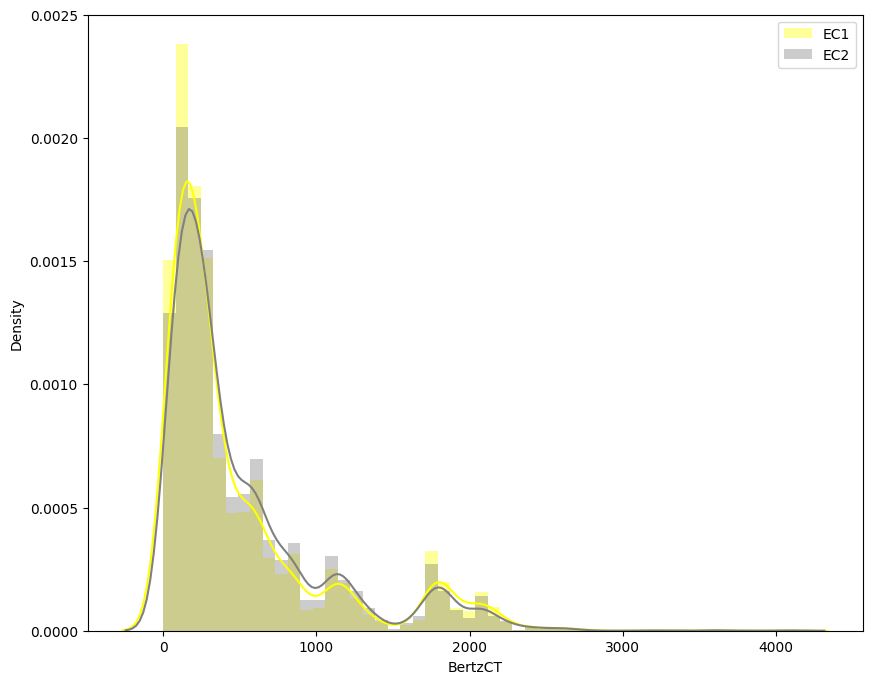

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

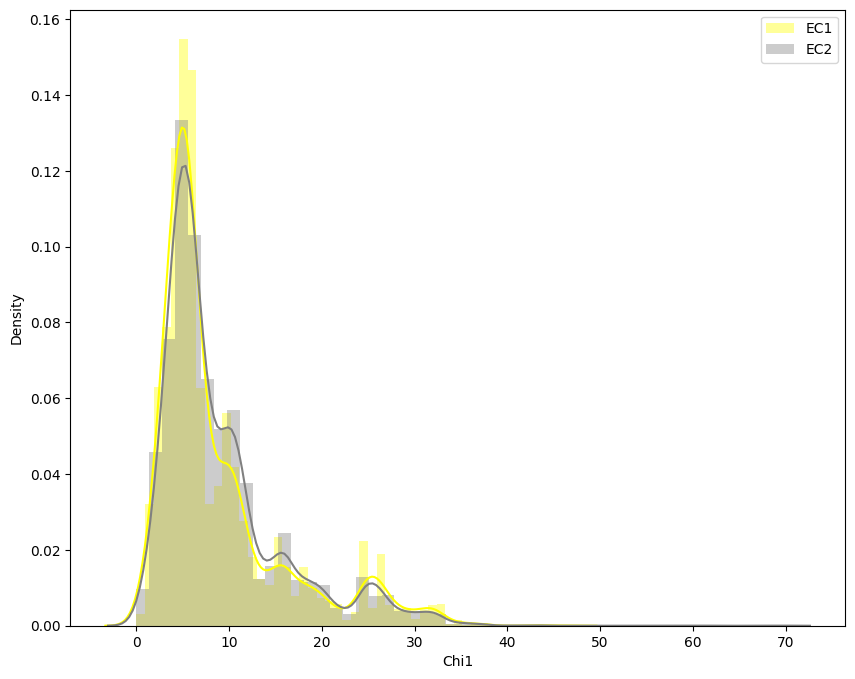

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

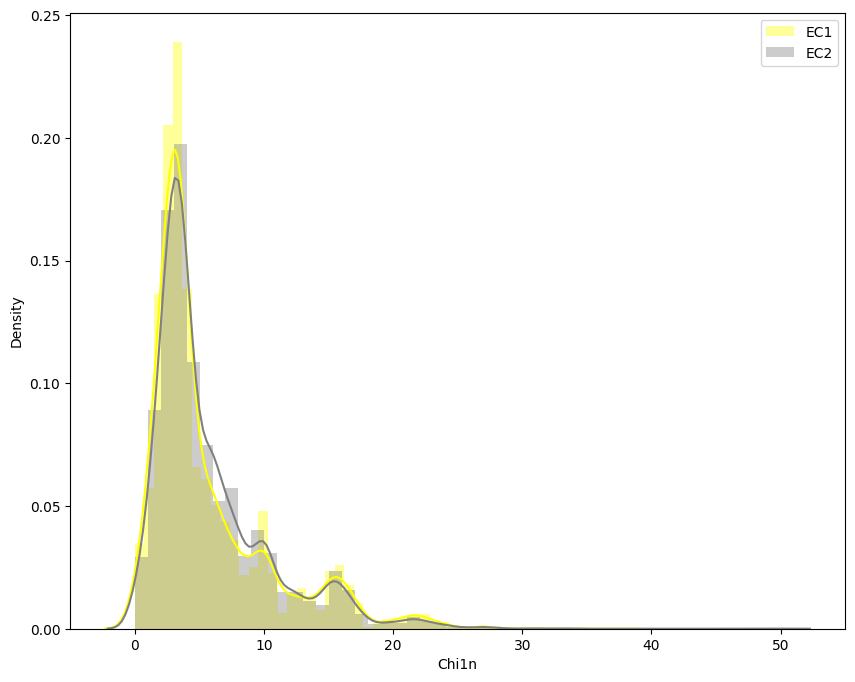

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

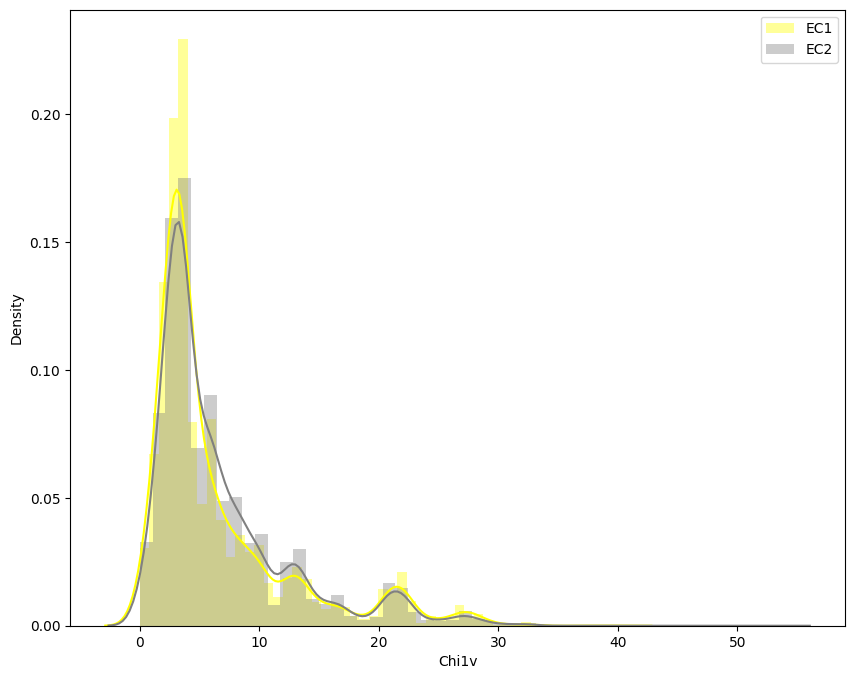

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

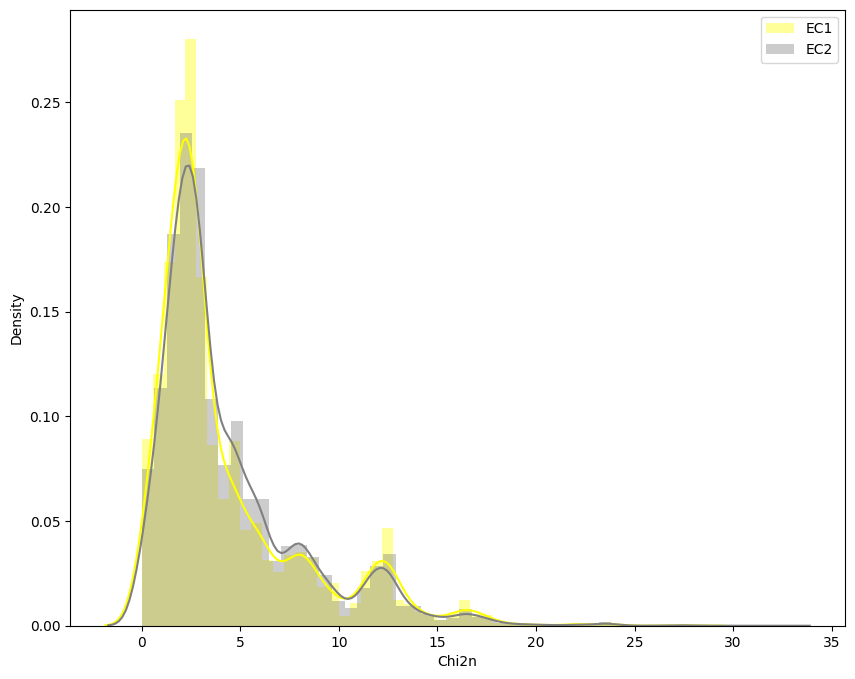

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

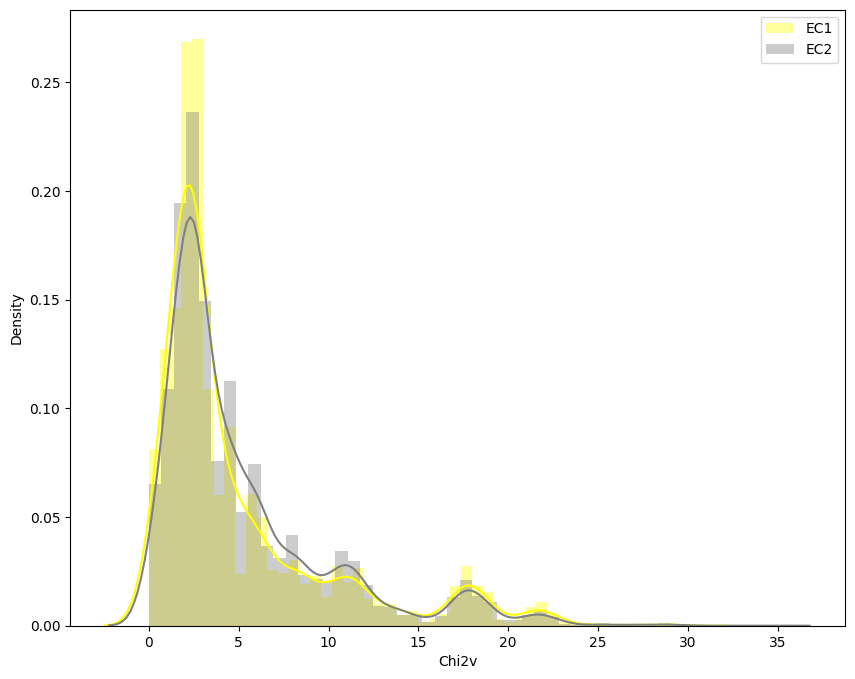

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

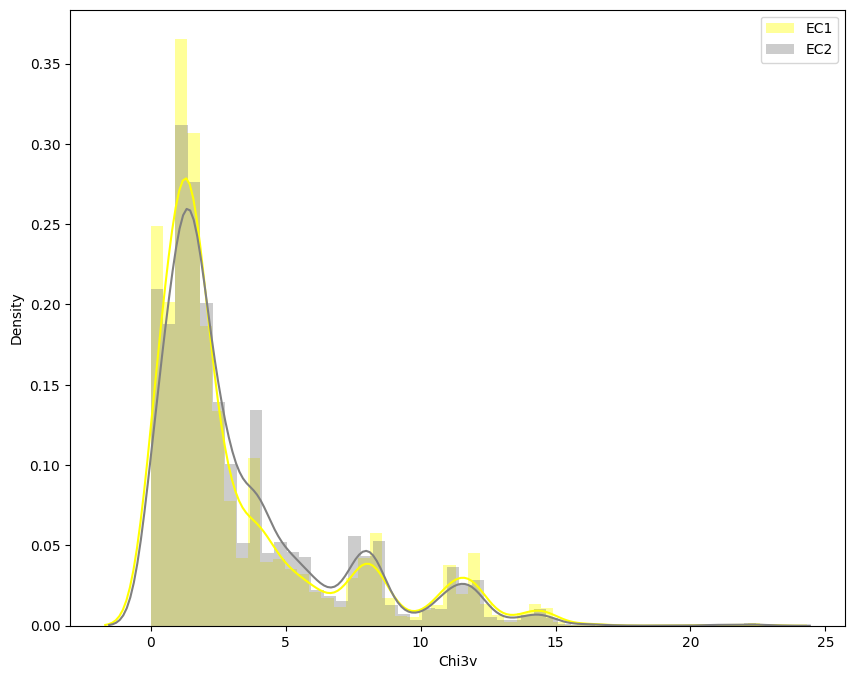

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

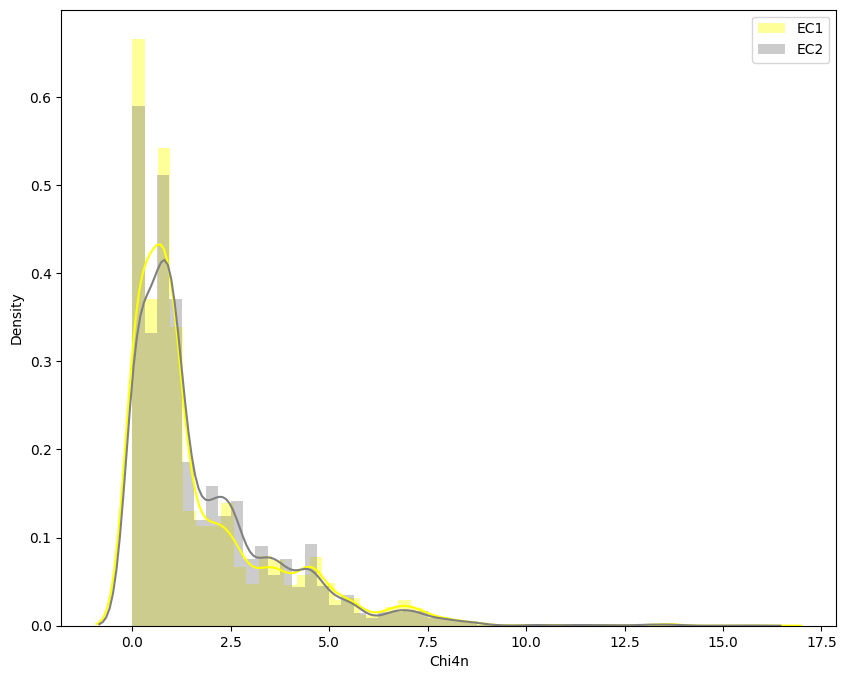

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

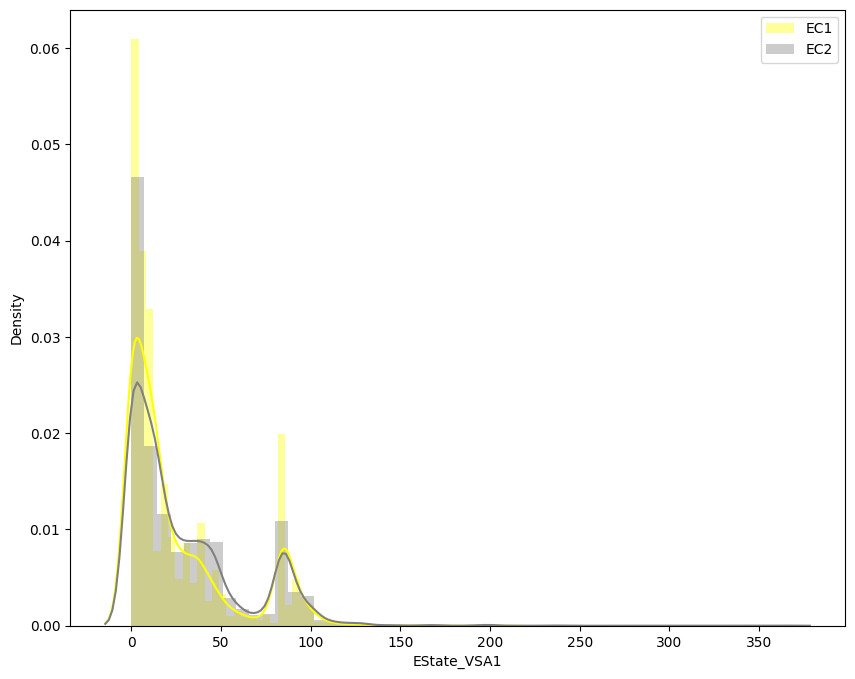

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

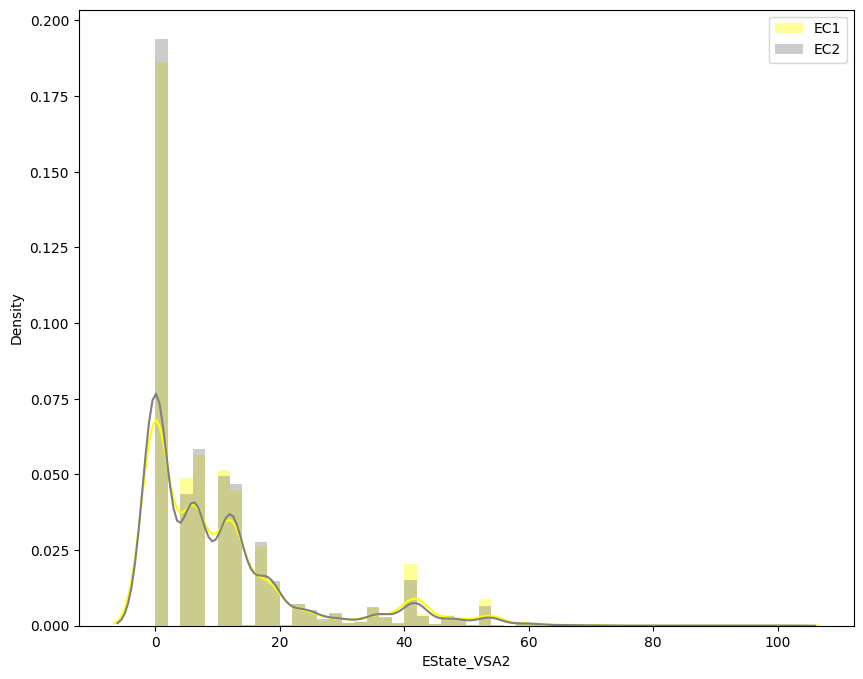

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

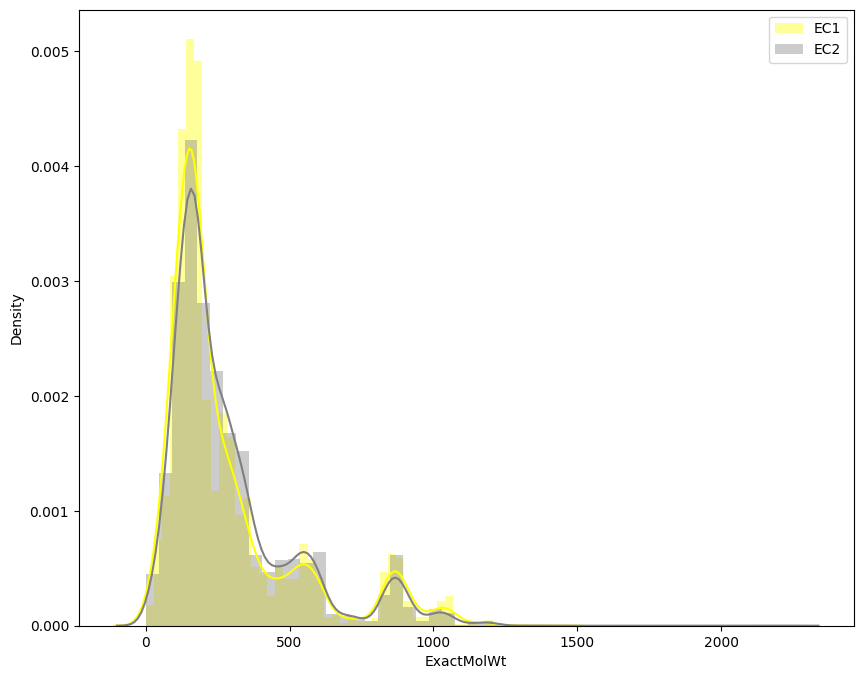

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

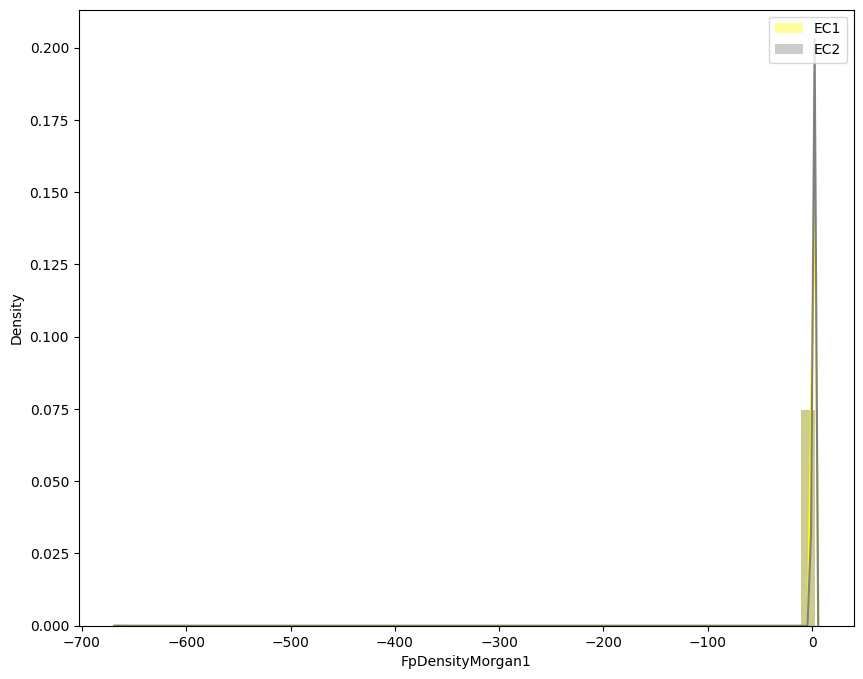

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

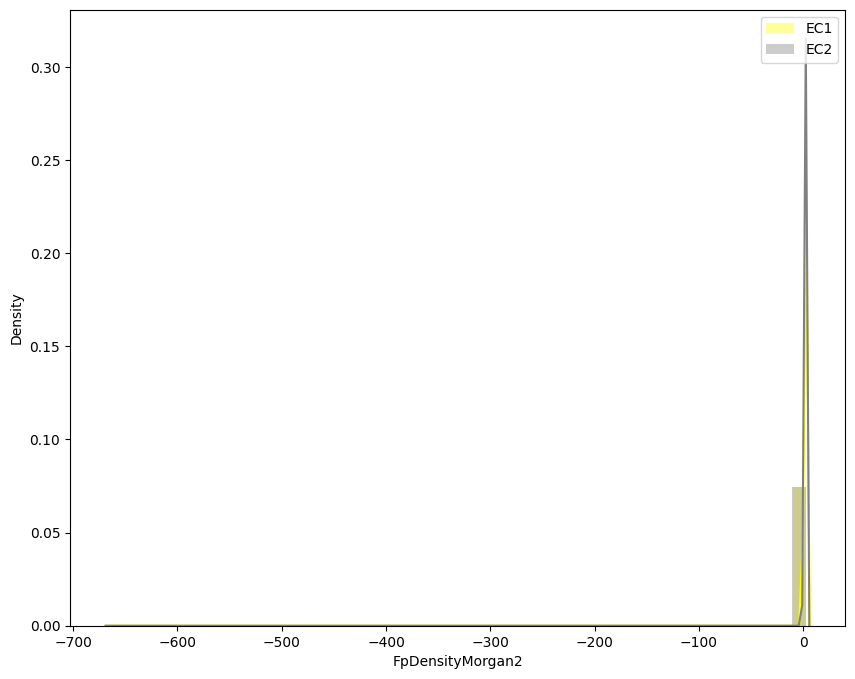

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

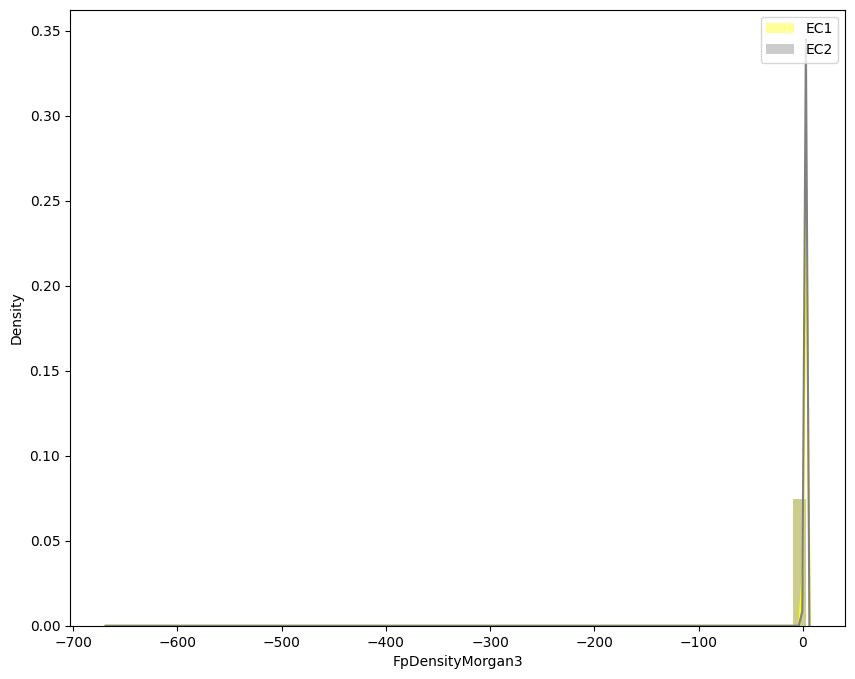

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

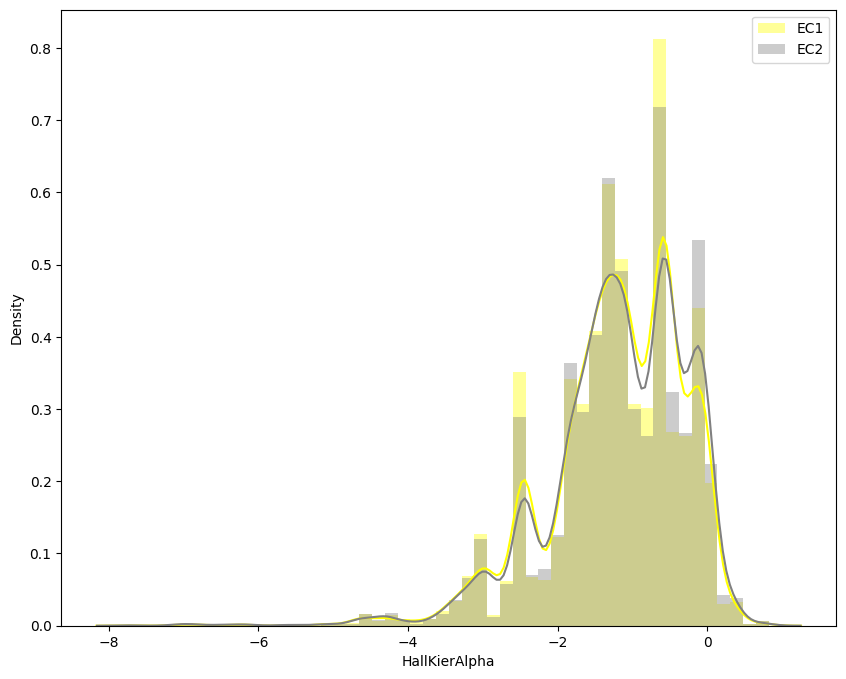

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

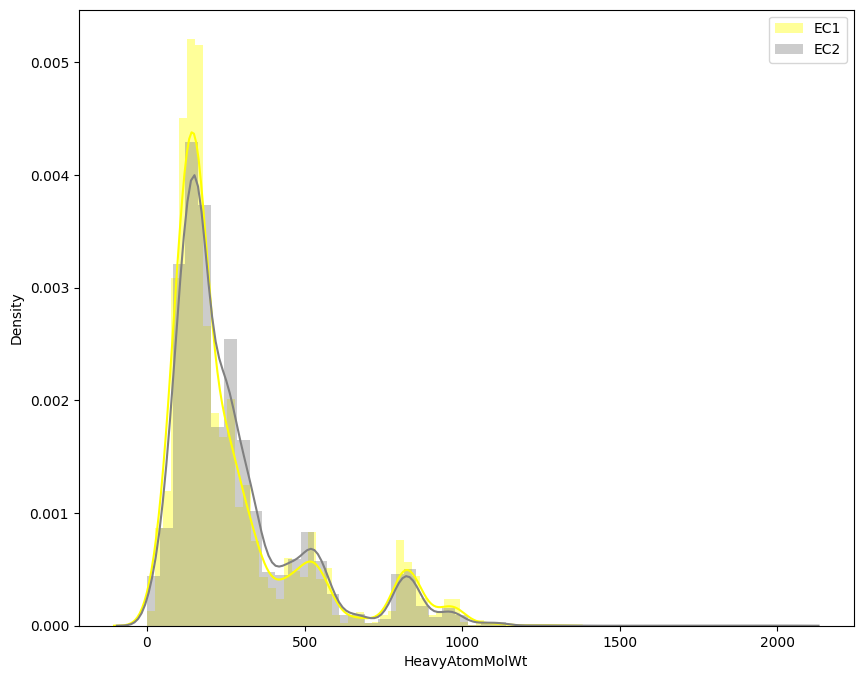

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

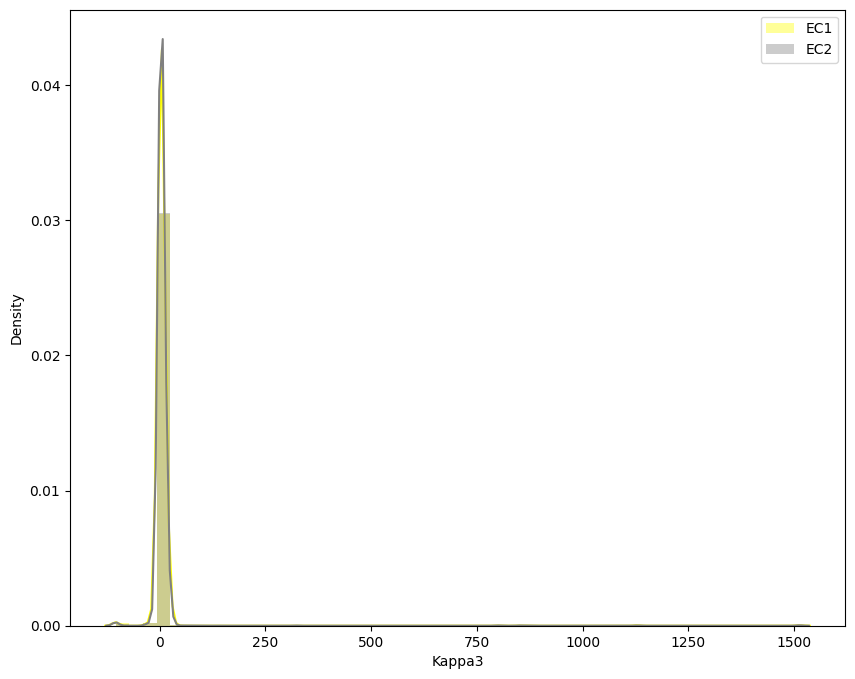

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

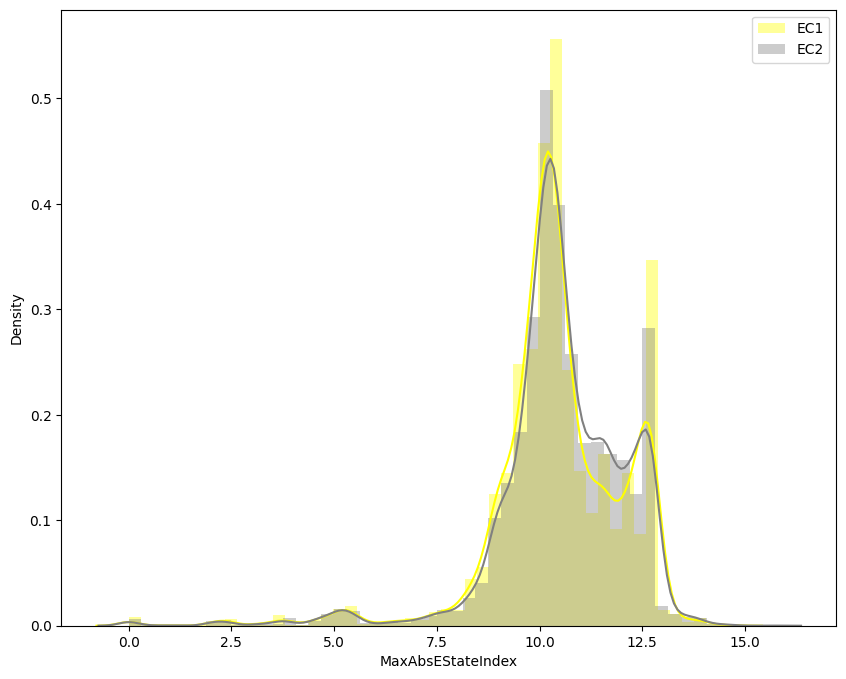

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

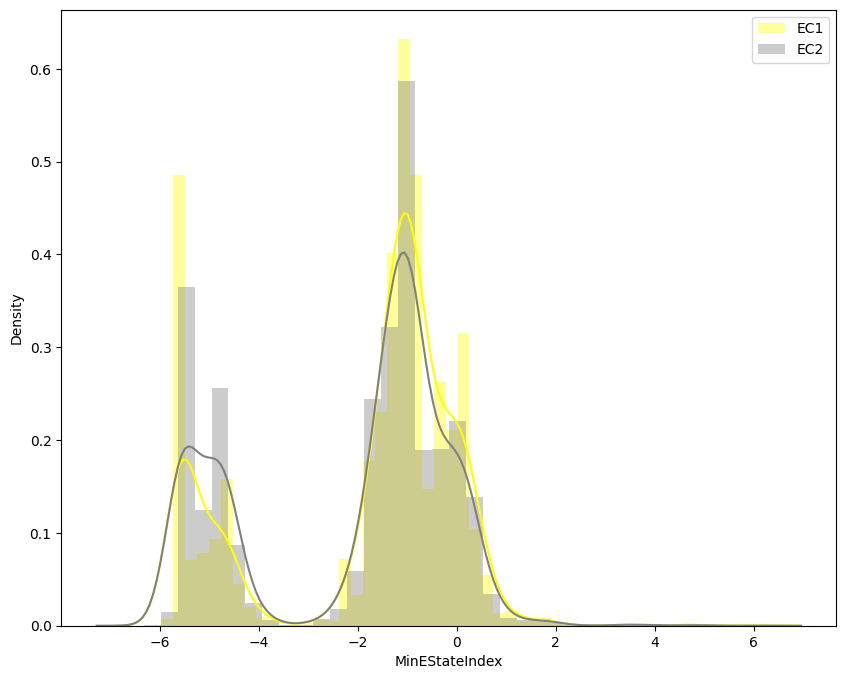

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

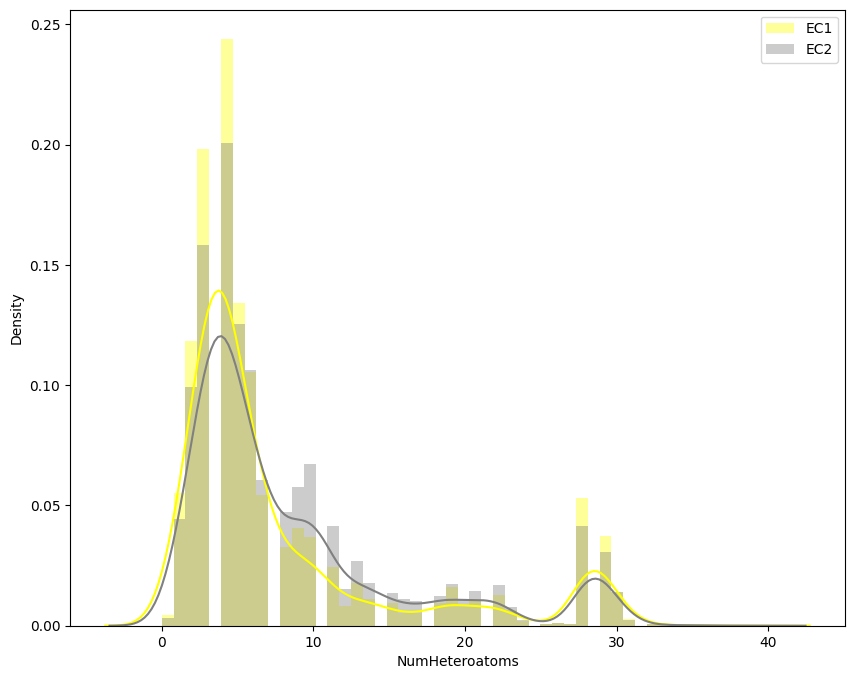

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

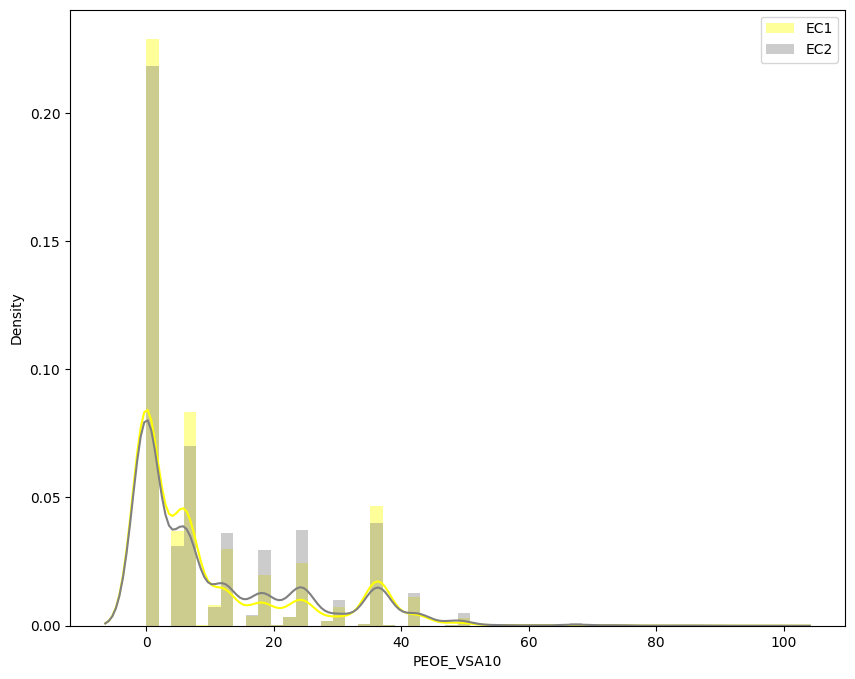

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

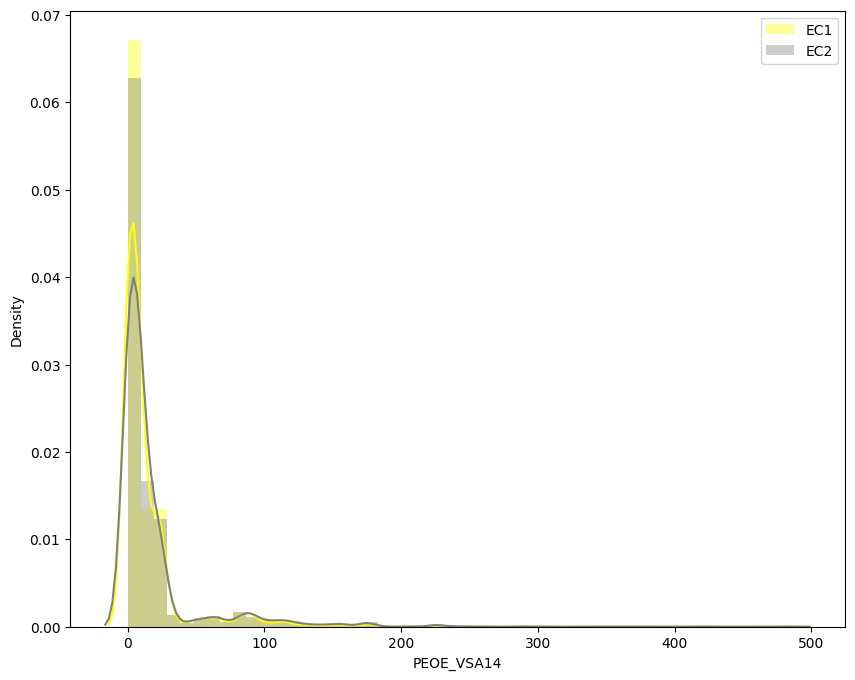

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

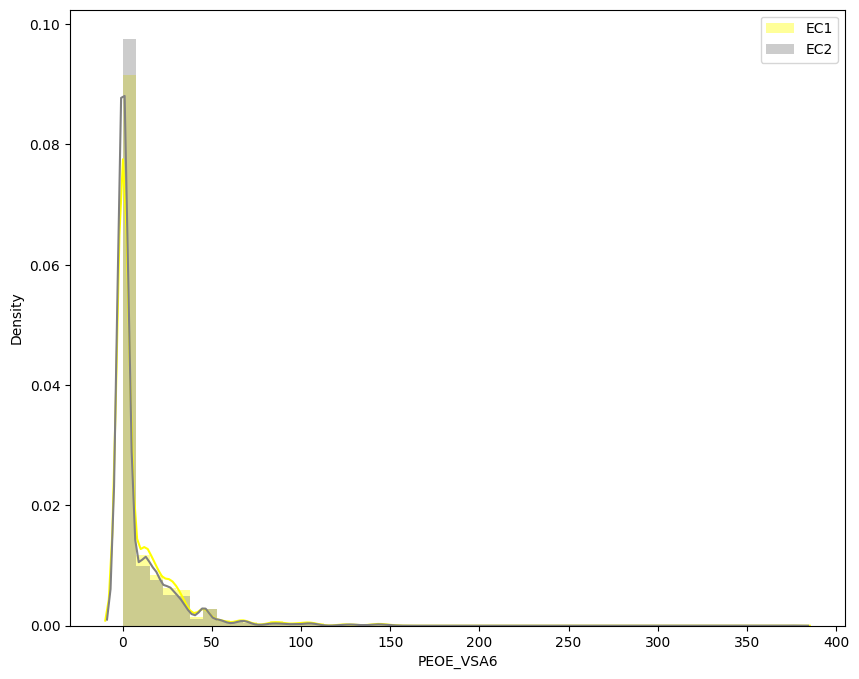

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

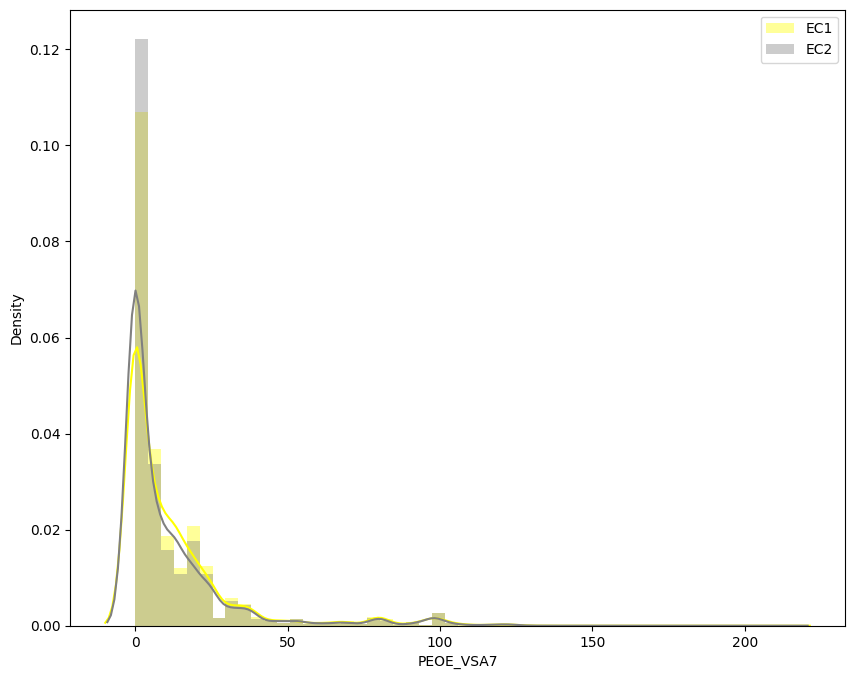

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

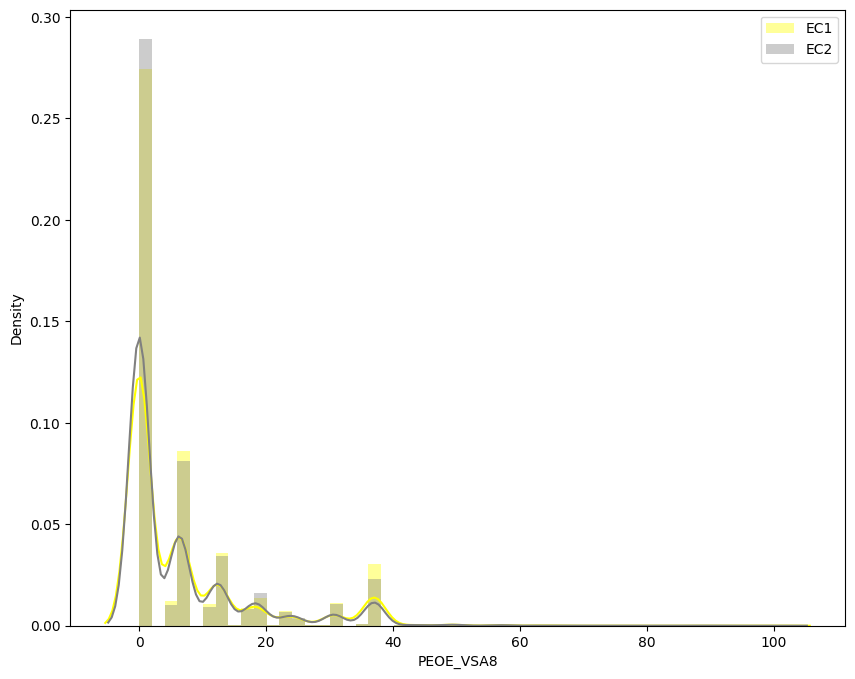

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

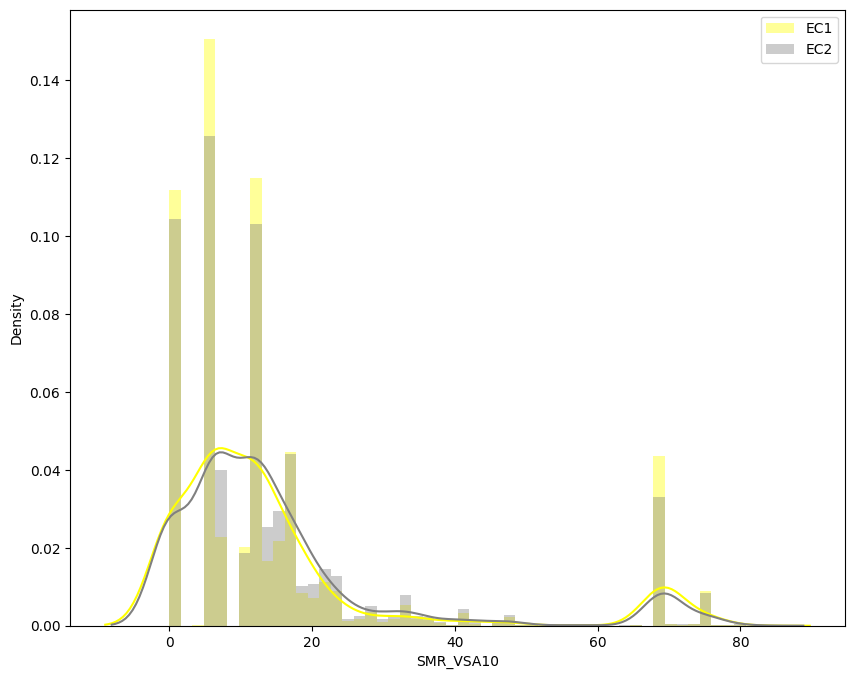

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

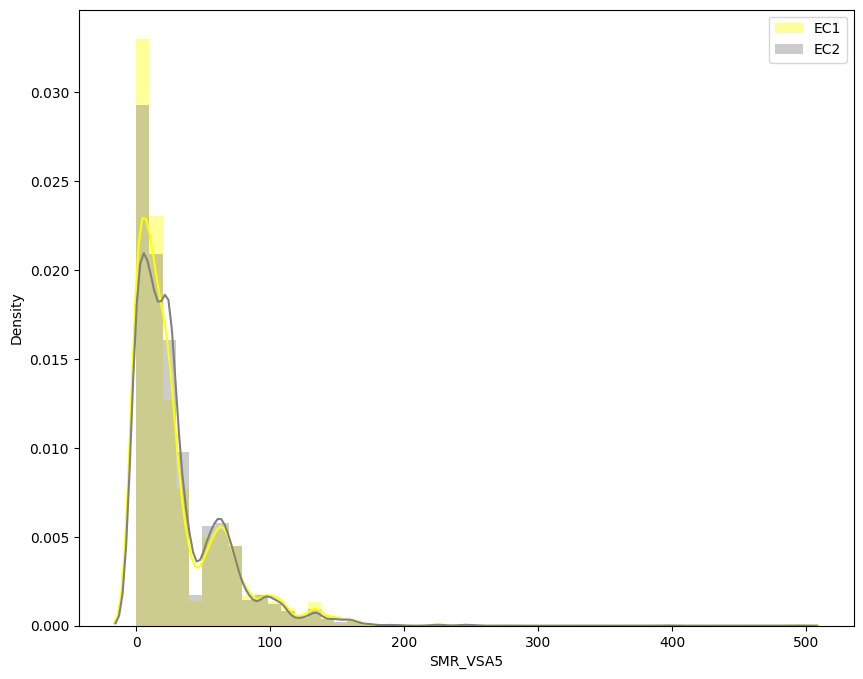

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

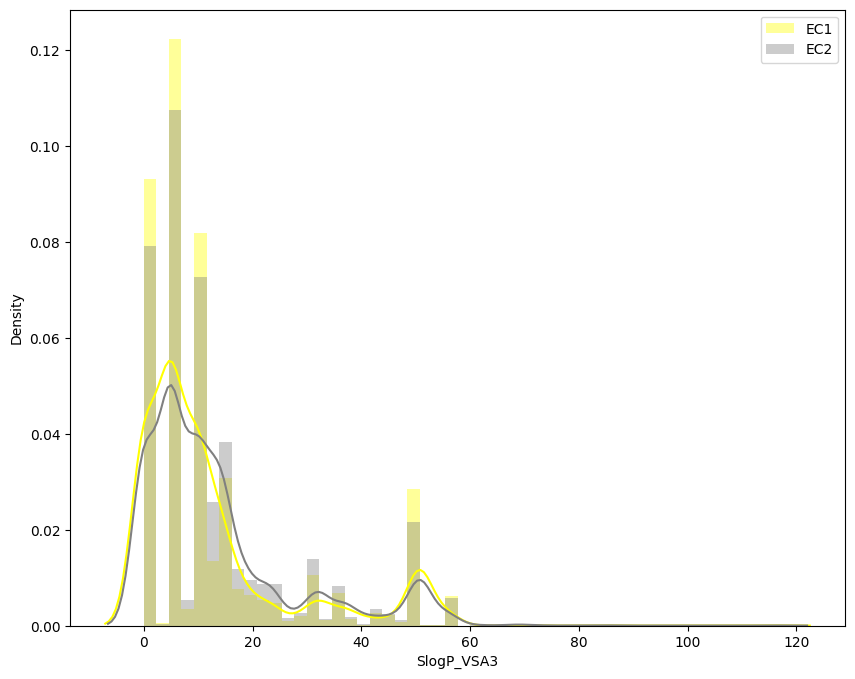

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

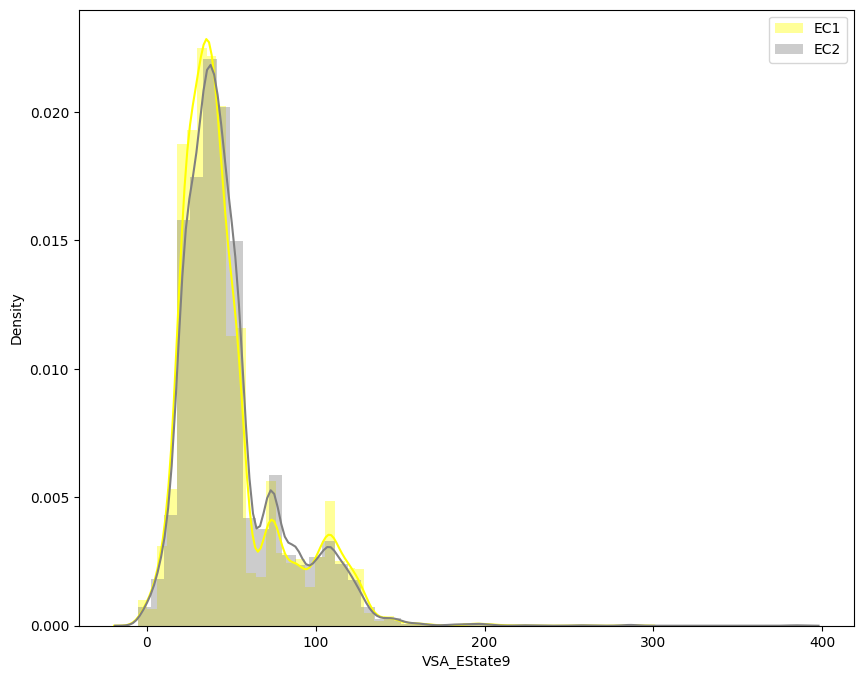

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

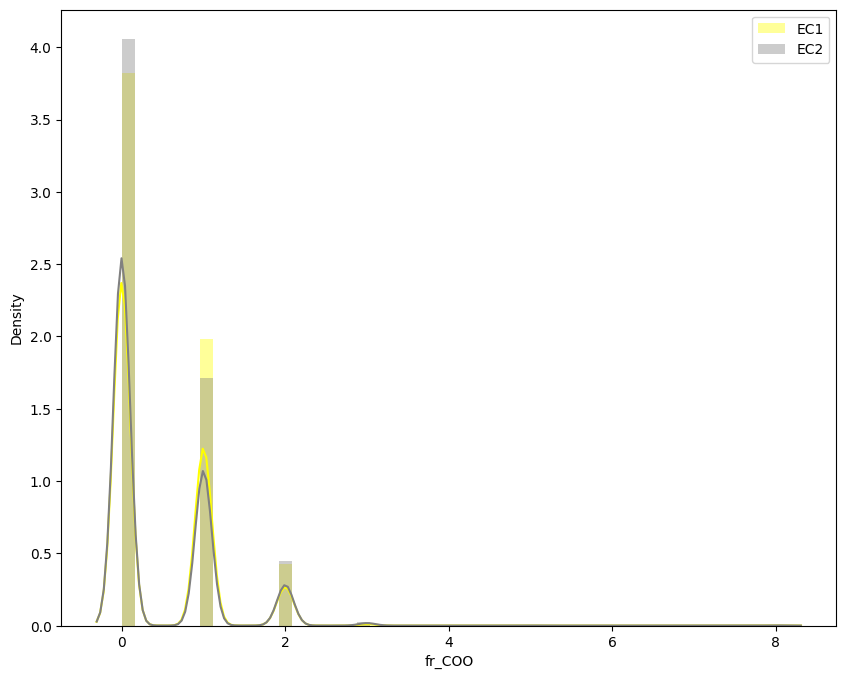

C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
C:\Users\pfali\AppData\Local\Temp\ipykernel_49448\689790827.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

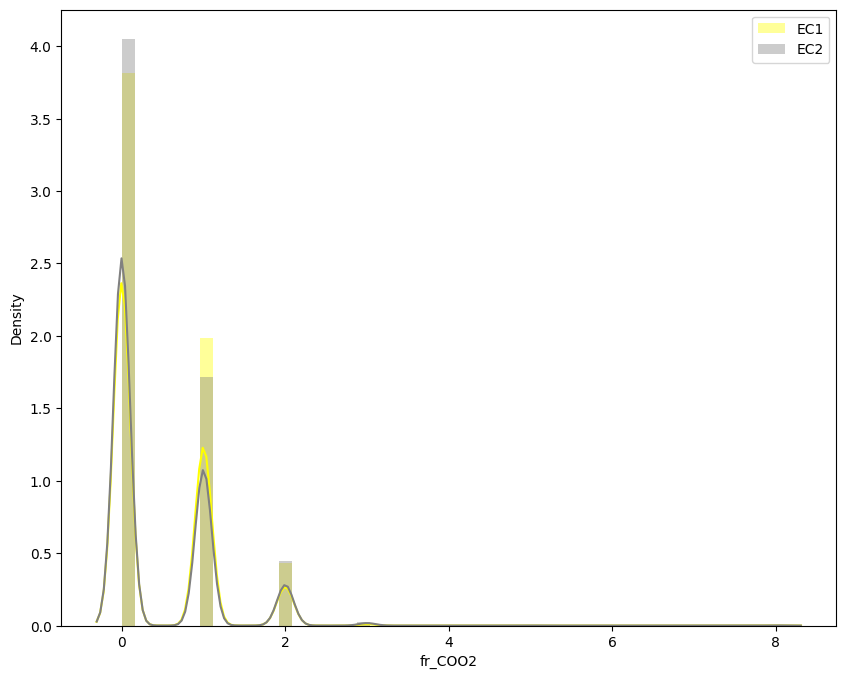

In [10]:
for feature in features:
    plt.figure(figsize=(10,8))
    sns.distplot(train_df.loc[train_df['EC1']==1,feature],kde=True,color='yellow',label='EC1')
    sns.distplot(train_df.loc[train_df['EC2']==1,feature],kde=True,color='grey',label='EC2')
    plt.legend(loc='upper right')
    plt.show()

In [11]:
print(features)

['BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v', 'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha', 'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex', 'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9', 'fr_COO', 'fr_COO2']


In [12]:
train_df.drop(columns=['BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v', 'Chi4n' , 'HallKierAlpha', 'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7','SMR_VSA5','fr_COO2'],inplace=True)
list=train_df.columns.tolist()
list.remove('EC1')
list.remove('EC2')
list.remove('id')

After plotting the correlations between the targets and the features, we deleted the features that seem the least helpful for determining the type of each enzyme substrate.

In [13]:
train_df.head()

id  EState_VSA1  EState_VSA2  ExactMolWt  FpDensityMorgan1  \
0   0     0.000000    11.938294  222.068080          1.181818   
1   1    45.135471     0.000000  260.029719          1.346154   
2   2    15.645394     6.606882  382.131027          1.085714   
3   3    95.639554     0.000000  530.070277          1.162791   
4   4    17.980451    12.841643  118.062994          1.444444   

   FpDensityMorgan2  FpDensityMorgan3  MinEStateIndex  NumHeteroatoms  \
0          1.727273          2.363636        0.171585               4   
1          2.076923          2.769231       -4.830450              10   
2          1.742857          2.400000       -5.066255               9   
3          1.573770          2.270270       -5.276575              19   
4          2.111111          2.555556       -1.676296               4   

   PEOE_VSA10  PEOE_VSA8  SMR_VSA10  SlogP_VSA3  VSA_EState9  fr_COO  EC1  EC2  
0    0.000000   0.000000  17.744066    4.794537    35.527357       0    1    1  
1   24.415866   0.000000   7.822697   13.825658    44.707310       0    0    1  
2    0.000000   0.000000  15.645394   17.964475    45.660120       0    1    1  
3   42.727765   6.420822  15.645394   31.961948    87.509997       0    1    1  
4    6.041841   0.000000  11.938611    9.589074    33.333333       2    1    0

In [14]:
train_df.describe(include='all')

id   EState_VSA1   EState_VSA2    ExactMolWt  \
count  14256.000000  14256.000000  14256.000000  14256.000000   
mean    7420.489057     28.999233     10.471978    292.321888   
std     4284.243768     31.802714     13.650332    226.034659   
min        0.000000      0.000000      0.000000      1.007276   
25%     3711.750000      5.969305      0.000000    148.037173   
50%     7427.500000     17.265402      6.420822    206.042653   
75%    11130.250000     44.667820     12.841643    343.090331   
max    14837.000000    363.705954     99.936429   2237.318490   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  MinEStateIndex  \
count      14256.000000      14256.000000      14256.000000    14256.000000   
mean           1.235616          1.810505          2.253534       -2.107305   
std            5.601844          5.606231          5.611952        2.070511   
min         -666.000000       -666.000000       -666.000000       -6.327514   
25%            1.045455          1.690909          2.100000       -4.656811   
50%            1.250000          1.866667          2.358491       -1.257037   
75%            1.500000          2.062500          2.500000       -0.784722   
max            3.000000          3.200000          3.400000        6.000000   

       NumHeteroatoms    PEOE_VSA10     PEOE_VSA8     SMR_VSA10    SlogP_VSA3  \
count    14256.000000  14256.000000  14256.000000  14256.000000  14256.000000   
mean         8.560396     10.974398      6.738614     15.654016     13.586596   
std          7.665206     13.962709     10.907003     18.147176     14.640182   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          4.000000      0.000000      0.000000      5.969305      4.794537   
50%          5.000000      6.041841      0.000000     11.752550      9.589074   
75%         10.000000     18.311899      6.923737     17.721856     14.912664   
max         39.000000     97.663462    100.348416     80.742293    115.406157   

        VSA_EState9        fr_COO           EC1           EC2  
count  14256.000000  14256.000000  14256.000000  14256.000000  
mean      49.235392      0.452441      0.695006      0.831580  
std       29.285355      0.664886      0.460421      0.374252  
min       -5.430556      0.000000      0.000000      0.000000  
25%       30.000000      0.000000      0.000000      1.000000  
50%       41.666667      0.000000      1.000000      1.000000  
75%       56.083333      1.000000      1.000000      1.000000  
max      384.450519      8.000000      1.000000      1.000000

Some features might require rescaling.

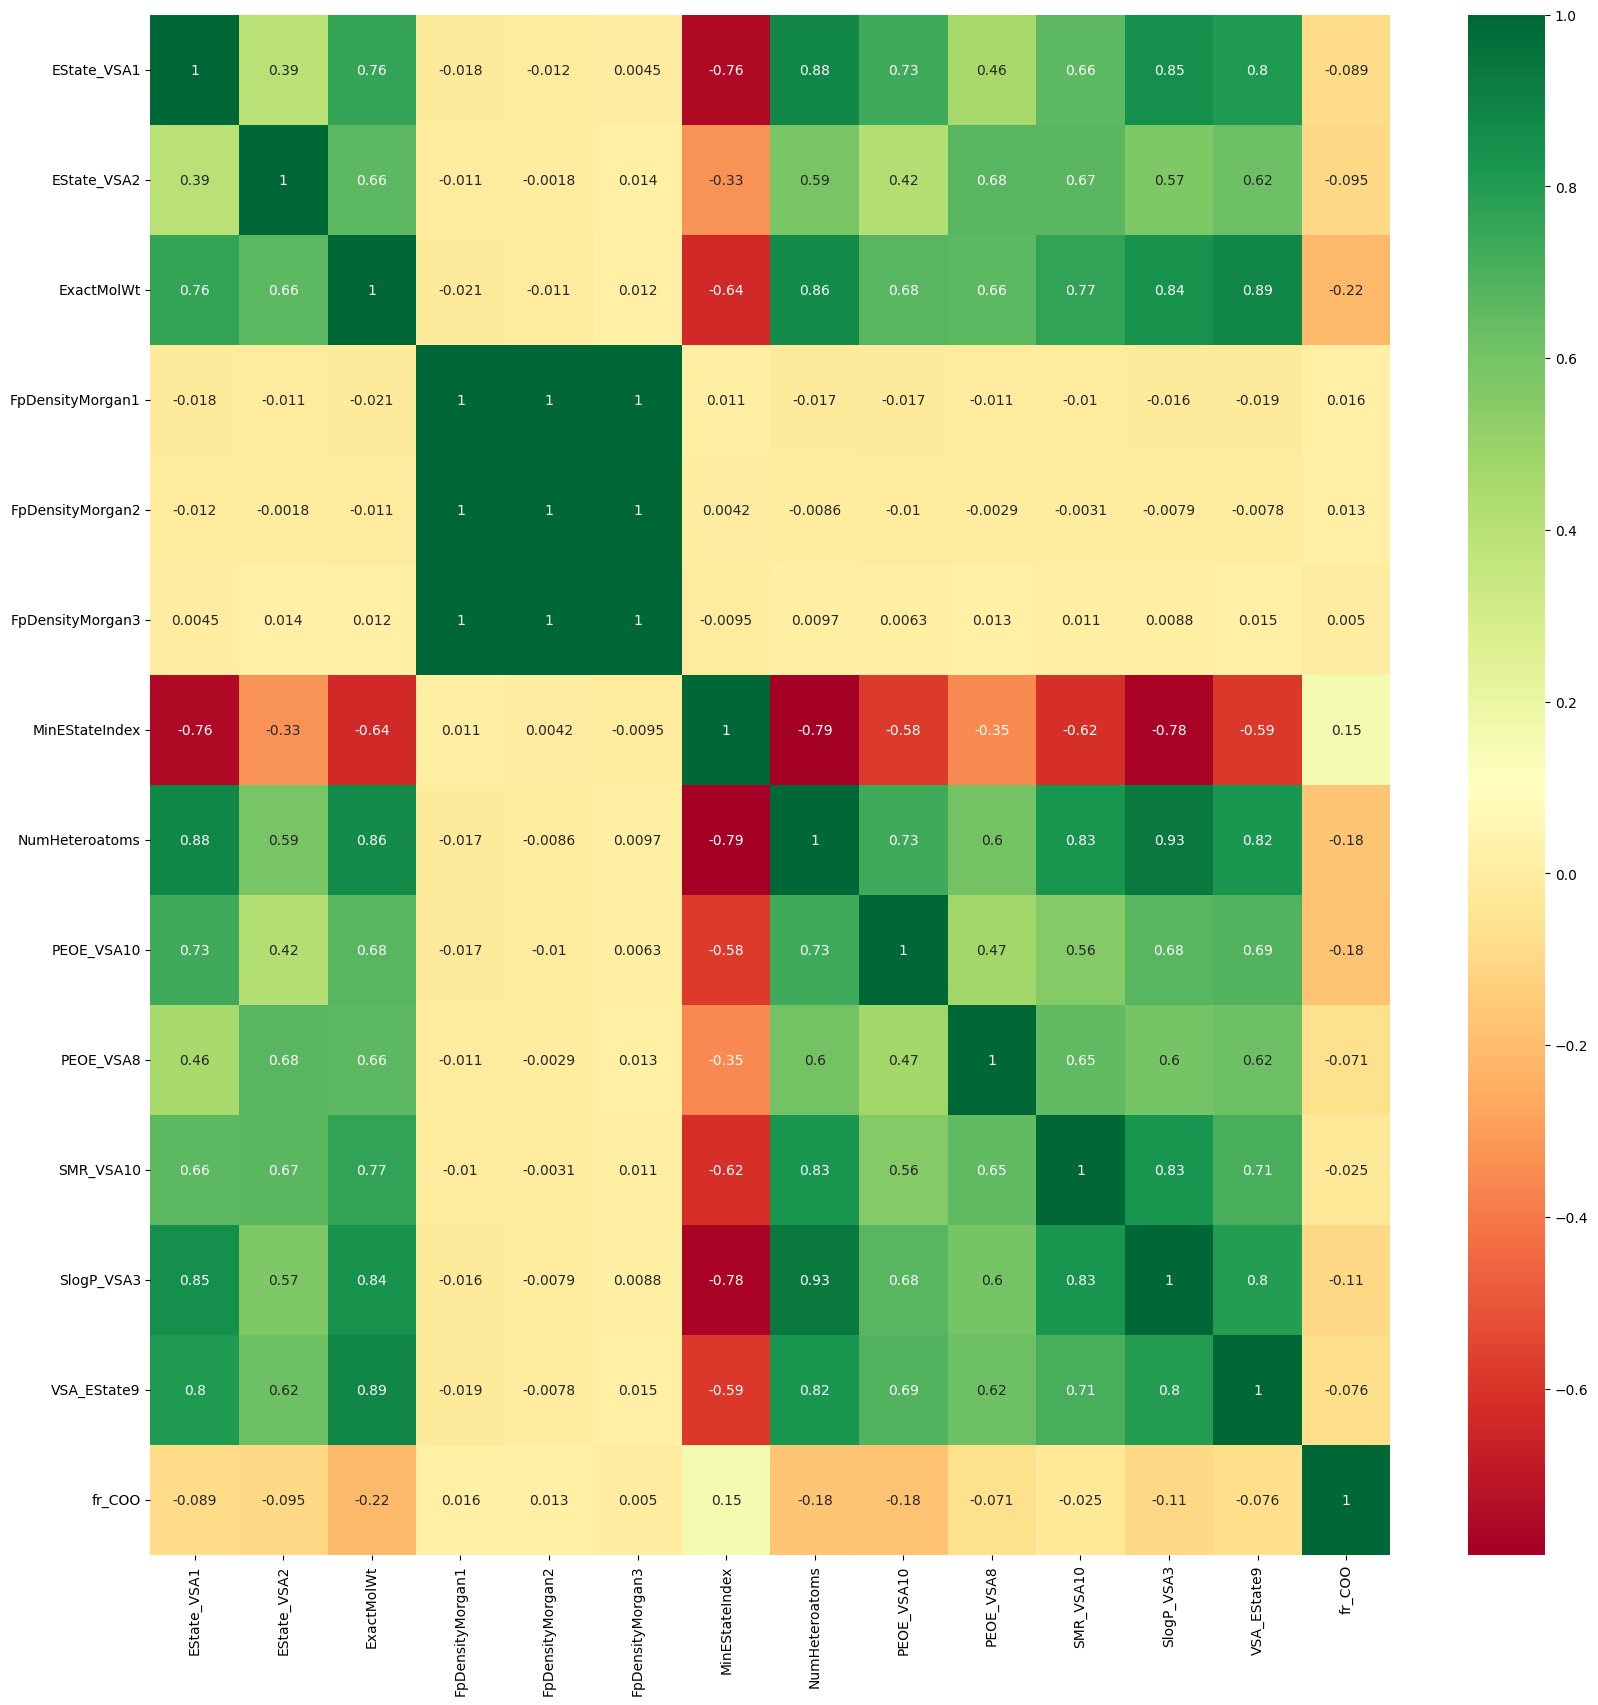

In [15]:
plt.figure(figsize=(20,20))
ax=sns.heatmap(train_df[list].corr(),xticklabels=train_df[list].corr().columns,yticklabels=train_df[list].corr().columns,cmap='RdYlGn',annot=True)
plt.show()

Some features are highly correlated with each other, so one features per such a pair should be dropped.

In [16]:
list2=train_df.columns.tolist()
print(list2)

['id', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'MinEStateIndex', 'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA8', 'SMR_VSA10', 'SlogP_VSA3', 'VSA_EState9', 'fr_COO', 'EC1', 'EC2']


In [17]:
train_df.drop(columns=['EState_VSA1', 'EState_VSA2','FpDensityMorgan2', 'FpDensityMorgan3', 'NumHeteroatoms', 'PEOE_VSA8', 'SMR_VSA10', 'SlogP_VSA3', 'VSA_EState9'],inplace=True)

In [18]:
list3=train_df.columns.tolist()
list3.remove('id')
list3.remove('EC1')
list3.remove('EC2')

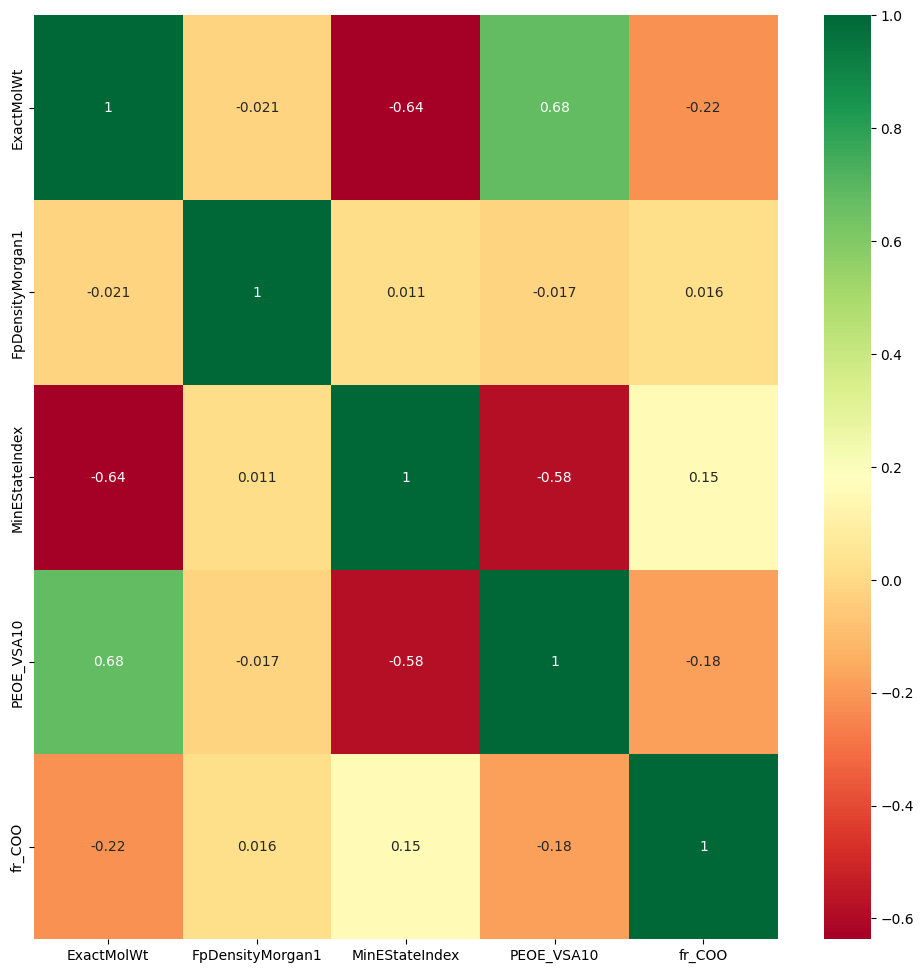

In [19]:
plt.figure(figsize=(12,12))
ax=sns.heatmap(train_df[list3].corr(),xticklabels=train_df[list3].corr().columns,yticklabels=train_df[list3].corr().columns,cmap='RdYlGn',annot=True)
plt.show()

We left only those features that are not so correlated with each other, leaving only 'PEOE_VSA10', which is correlated to 'ExactMolWt', but it is correlated with both targets, so can be helpful in training.

In [20]:
train_df.describe()

id    ExactMolWt  FpDensityMorgan1  MinEStateIndex  \
count  14256.000000  14256.000000      14256.000000    14256.000000   
mean    7420.489057    292.321888          1.235616       -2.107305   
std     4284.243768    226.034659          5.601844        2.070511   
min        0.000000      1.007276       -666.000000       -6.327514   
25%     3711.750000    148.037173          1.045455       -4.656811   
50%     7427.500000    206.042653          1.250000       -1.257037   
75%    11130.250000    343.090331          1.500000       -0.784722   
max    14837.000000   2237.318490          3.000000        6.000000   

         PEOE_VSA10        fr_COO           EC1           EC2  
count  14256.000000  14256.000000  14256.000000  14256.000000  
mean      10.974398      0.452441      0.695006      0.831580  
std       13.962709      0.664886      0.460421      0.374252  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      1.000000  
50%        6.041841      0.000000      1.000000      1.000000  
75%       18.311899      1.000000      1.000000      1.000000  
max       97.663462      8.000000      1.000000      1.000000

Some instances are at the same time classified as EC1 and EC2, thus, we have to use a model that supports multilabel classification. Let's try with using KNeighbors Classifier. 
Our data have different scales, so we will use Stadard Scaler and Polynomial Features, as the above plots display not linear correlation between the features and the targets.

In [25]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_curve, f1_score, roc_auc_score
from sklearn.multioutput import ClassifierChain

X=train_df.drop(['id','EC1','EC2'],axis=1)
y=train_df[["EC1","EC2"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y, random_state=42)

metrics_df=pd.DataFrame(columns=['Model','F1_score','AUC'])
models=[]
models_names=[]
predictions_proba_list=[]

def calculate_metric(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_df
    predictions=model.predict(X_checked)
    predictions_proba=model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])
    print(classification_report(y_checked,predictions))
    fig=plt.figure(figure=(6,6))
    plt.plot([0,1],[0,1],'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric=f1_score(y_checked,predictions)
    auc_metric=roc_auc_score(y_checked,predictions_proba[:,1])
    metrics_df=metrics_df.append({'Model':name, 'F1_score':f1_metric,'AUC':auc_metric},ignore_index=True)

    return metrics_df

lr = LogisticRegression()
kn = KNeighborsClassifier()
ada = AdaBoostClassifier()
random_forest = RandomForestClassifier()
 
models_ =(lr, kn, ada, random_forest)

for m in models_:
    pipeline=make_pipeline(StandardScaler(),PolynomialFeatures(),m)
    parameter_search=GridSearchCV(pipeline,degrees,scoring='f1_macro')
    chains=[ClassifierChain(pipeline, order="random", random_state=i) for i in range(5)]
    for chain in chains:
        degrees={'polynomialfeatures__degree':[1,2,3,5]}   
        parameter_search.fit(X_train, y_train)
        print("The best parameters are:", parameter_search.best_params_)


ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1207, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\utils\validation.py", line 1163, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\utils\validation.py", line 1184, in _check_y
    y = column_or_1d(y, warn=True)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\utils\validation.py", line 1245, in column_or_1d
    raise ValueError(
ValueError: y should be a 1d array, got an array of shape (8553, 2) instead.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1207, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\utils\validation.py", line 1163, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\utils\validation.py", line 1184, in _check_y
    y = column_or_1d(y, warn=True)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\utils\validation.py", line 1245, in column_or_1d
    raise ValueError(
ValueError: y should be a 1d array, got an array of shape (8554, 2) instead.
